## BIG DATA AND DATA MINING - 001_CWRK: Project Report

## Name :OLAMIDE BANKOLE

## Student ID: 202428313

### Importing Libraries

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
#establishing a connection between sqlite and the database file
conn= sqlite3.connect("accident_data_v1.0.0_2023.db");

In [7]:
#creating a cursor object named 'cur' from the connection object 'conn'
#cursor allows us to execute SQL queries
cur=conn.cursor()

In [8]:
#printing a list of all the tables in the dataset to understand its structure
table_names = conn.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
print(table_names)

[('accident',), ('casualty',), ('vehicle',), ('lsoa',)]


In [9]:
#fetching the columns in the accident table
info_accident = cur.execute(f"PRAGMA table_info(accident)")
info_accident.fetchall()

[(0, 'accident_index', '', 0, None, 1),
 (1, 'accident_year', '', 0, None, 0),
 (2, 'accident_reference', '', 0, None, 0),
 (3, 'location_easting_osgr', '', 0, None, 0),
 (4, 'location_northing_osgr', '', 0, None, 0),
 (5, 'longitude', '', 0, None, 0),
 (6, 'latitude', '', 0, None, 0),
 (7, 'police_force', '', 0, None, 0),
 (8, 'accident_severity', '', 0, None, 0),
 (9, 'number_of_vehicles', '', 0, None, 0),
 (10, 'number_of_casualties', '', 0, None, 0),
 (11, 'date', '', 0, None, 0),
 (12, 'day_of_week', '', 0, None, 0),
 (13, 'time', '', 0, None, 0),
 (14, 'local_authority_district', '', 0, None, 0),
 (15, 'local_authority_ons_district', '', 0, None, 0),
 (16, 'local_authority_highway', '', 0, None, 0),
 (17, 'first_road_class', '', 0, None, 0),
 (18, 'first_road_number', '', 0, None, 0),
 (19, 'road_type', '', 0, None, 0),
 (20, 'speed_limit', '', 0, None, 0),
 (21, 'junction_detail', '', 0, None, 0),
 (22, 'junction_control', '', 0, None, 0),
 (23, 'second_road_class', '', 0, None,

In [10]:
#fetching the columns in the vehicle table
info_vehicle = cur.execute(f"PRAGMA table_info(vehicle)")
info_vehicle.fetchall()

[(0, 'vehicle_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'vehicle_type', '', 0, None, 0),
 (6, 'towing_and_articulation', '', 0, None, 0),
 (7, 'vehicle_manoeuvre', '', 0, None, 0),
 (8, 'vehicle_direction_from', '', 0, None, 0),
 (9, 'vehicle_direction_to', '', 0, None, 0),
 (10, 'vehicle_location_restricted_lane', '', 0, None, 0),
 (11, 'junction_location', '', 0, None, 0),
 (12, 'skidding_and_overturning', '', 0, None, 0),
 (13, 'hit_object_in_carriageway', '', 0, None, 0),
 (14, 'vehicle_leaving_carriageway', '', 0, None, 0),
 (15, 'hit_object_off_carriageway', '', 0, None, 0),
 (16, 'first_point_of_impact', '', 0, None, 0),
 (17, 'vehicle_left_hand_drive', '', 0, None, 0),
 (18, 'journey_purpose_of_driver', '', 0, None, 0),
 (19, 'sex_of_driver', '', 0, None, 0),
 (20, 'age_of_driver', '', 0, None, 0),
 (21, 'age_band_of_driver', 

In [11]:
#fetching the columns in the casualty table
info_casualty = cur.execute(f"PRAGMA table_info(casualty)")
info_casualty.fetchall()

[(0, 'casualty_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'casualty_reference', '', 0, None, 0),
 (6, 'casualty_class', '', 0, None, 0),
 (7, 'sex_of_casualty', '', 0, None, 0),
 (8, 'age_of_casualty', '', 0, None, 0),
 (9, 'age_band_of_casualty', '', 0, None, 0),
 (10, 'casualty_severity', '', 0, None, 0),
 (11, 'pedestrian_location', '', 0, None, 0),
 (12, 'pedestrian_movement', '', 0, None, 0),
 (13, 'car_passenger', '', 0, None, 0),
 (14, 'bus_or_coach_passenger', '', 0, None, 0),
 (15, 'pedestrian_road_maintenance_worker', '', 0, None, 0),
 (16, 'casualty_type', '', 0, None, 0),
 (17, 'casualty_home_area_type', '', 0, None, 0),
 (18, 'casualty_imd_decile', '', 0, None, 0)]

In [12]:
#fetching the columns in the lsoa table
info_lsoa = cur.execute(f"PRAGMA table_info(lsoa)")
info_lsoa.fetchall()

[(0, 'objectid', '', 0, None, 1),
 (1, 'lsoa01cd', '', 0, None, 0),
 (2, 'lsoa01nm', '', 0, None, 0),
 (3, 'lsoa01nmw', '', 0, None, 0),
 (4, 'shape__area', '', 0, None, 0),
 (5, 'shape__length', '', 0, None, 0),
 (6, 'globalid', '', 0, None, 0)]

### Data Cleaning, Exploration and Analysis 

#### Let's filter the dataset to focus on 2020 accident data and import the tables from SQLite into a Pandas DataFrame.

In [15]:
#filtering the accident table for the year 2020
query_accident = "SELECT * FROM accident WHERE accident_year = 2020"

accident_df_2020 = pd.read_sql_query(query_accident , conn)

In [16]:
#filtering the vehicle table for the year 2020
query_vehicle = "SELECT * FROM vehicle WHERE accident_year = 2020"

vehicle_df_2020 = pd.read_sql_query(query_vehicle, conn)

In [17]:
#filtering the casualty table for the year 2020
query_casualty = "SELECT * FROM casualty WHERE accident_year = 2020"

casualty_df_2020 = pd.read_sql_query(query_casualty, conn)

In [18]:
lsoa_df = pd.read_sql_query("SELECT * FROM lsoa", conn)

In [19]:
print ('2020 ACCIDENT DATA')
accident_df_2020

2020 ACCIDENT DATA


accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
1      2020010220496           2020          010220496               529337.0   
2      2020010228005           2020          010228005               526432.0   
3      2020010228006           2020          010228006               538676.0   
4      2020010228011           2020          010228011               529324.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    175144.0  -0.254001  51.462262             1   
1                    176237.0  -0.139253  51.470327             1   
2                    182761.0  -0.178719  51.529614             1   
3                    184371.0  -0.001683  51.541210             1   
4                    181286.0  -0.137592  51.515704             1   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  ...  \
0                      3                   1  ...   
1                      3                   1  ...   
2                      3                   1  ...   
3                      2                   1  ...   
4                      3                   1  ...   
...                  ...                 ...  ...   
91194                  2                   2  ...   
91195                  3                   1  ...   
91196                  2                   2  ...   
91197                  3                   2  ...   
91198                  3                   1  ...   

       pedestrian_crossing_physical_facilities light_conditions  \
0                                            9                1   
1                                            4                1   
2                                            0                4   
3                                            4                4   
4                                            0                4   
...                                        ...              ...   
91194                                        0                1   
91195                                        0                1   
91196                                        0                1   
91197                                        0                1   
91198                                        0                1   

       weather_conditions road_surface_conditions  special_conditions_at_site  \
0                       9                       9                           0   
1                       1                       1                           0   
2                       1                       2                           0   
3                       1                       1                           0   
4                       1                       1                           0   
...                   ...                     ...                         ...   
91194                   1                       1                           0   
91195                   1                       1                           0   
91196                   1        

In [20]:
print ('2020 VEHICLE DATA')
vehicle_df_2020

2020 VEHICLE DATA


vehicle_index accident_index  accident_year accident_reference  \
0              681716  2020010219808           2020          010219808   
1              681717  2020010220496           2020          010220496   
2              681718  2020010228005           2020          010228005   
3              681719  2020010228006           2020          010228006   
4              681720  2020010228011           2020          010228011   
...               ...            ...            ...                ...   
167370         849086  2020991030297           2020          991030297   
167371         849087  2020991030297           2020          991030297   
167372         849088  2020991030900           2020          991030900   
167373         849089  2020991030900           2020          991030900   
167374         849090  2020991032575           2020          991032575   

        vehicle_reference  vehicle_type  towing_and_articulation  \
0                       1             9                        9   
1                       1             9                        0   
2                       1             9                        0   
3                       1             8                        0   
4                       1             9                        0   
...                   ...           ...                      ...   
167370                  1             9                        0   
167371                  2             5                        0   
167372                  1             9                        0   
167373                  2             1                        0   
167374                  1             9                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
0                       5                       1                     5  ...   
1                       4                       2                     6  ...   
2                      18                      -1                    -1  ...   
3                      18                       1                     5  ...   
4                      18                       3                     7  ...   
...                   ...                     ...                   ...  ...   
167370                  7                       8                     2  ...   
167371                 16                       6                     2  ...   
167372                  7                       8                     2  ...   
167373                 18                       6                     2  ...   
167374                  1                       8                     4  ...   

        journey_purpose_of_driver  sex_of_driver  age_of_driver  \
0                               6              2             32   
1                               2              1             45   
2                               6              3             -1   
3                               1              1             44   
4                               6              1             20   
...                           ...            ...            ...   
167370                          1              1             57   
167371                          5              1             38   
167372                          6              2             68   
167373                          6              1             76   
167374                          6              1             39   

        age_band_of_driver  engine_capacity_cc  propulsion_code  \
0                        6                1968                2   
1                        7                1395                1   
2                       -1                  -1               -1   
3                        7                1798                8   
4                        4                2993                2   
...                    ...                 ...              ...   
167370                   9                1968                2   


In [21]:
print ('2020 CASUALTY DATA')
casualty_df_2020

2020 CASUALTY DATA


casualty_index accident_index  accident_year accident_reference  \
0               484748  2020010219808           2020          010219808   
1               484749  2020010220496           2020          010220496   
2               484750  2020010220496           2020          010220496   
3               484751  2020010228005           2020          010228005   
4               484752  2020010228006           2020          010228006   
...                ...            ...            ...                ...   
115579          600327  2020991027064           2020          991027064   
115580          600328  2020991029573           2020          991029573   
115581          600329  2020991030297           2020          991030297   
115582          600330  2020991030900           2020          991030900   
115583          600331  2020991032575           2020          991032575   

        vehicle_reference  casualty_reference  casualty_class  \
0                       1                   1               3   
1                       1                   1               3   
2                       1                   2               3   
3                       1                   1               3   
4                       1                   1               3   
...                   ...                 ...             ...   
115579                  2                   1               1   
115580                  1                   1               3   
115581                  2                   1               1   
115582                  2                   1               1   
115583                  1                   1               3   

        sex_of_casualty  age_of_casualty  age_band_of_casualty  \
0                     1               31                     6   
1                     2                2                     1   
2                     2                4                     1   
3                     1               23                     5   
4                     1               47                     8   
...                 ...              ...                   ...   
115579                1               11                     3   
115580                2               63                     9   
115581                1               38                     7   
115582                1               76                    11   
115583                1               48                     8   

        casualty_severity  pedestrian_location  pedestrian_movement  \
0                       3                    9                    5   
1                       3                    1                    1   
2                       3                    1                    1   
3                       3                    5                    9   
4                       2                    4                    1   
...                   ...                  ...                  ...   
115579                  2                    0                    0   
115580                  3                   10                    1   
115581                  2                    0                    0   
115582                  3                    0                    0   
115583                  3                    9                    9   

        car_passenger  bus_or_coach_passenger  \
0                   0                       0   
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   
...               ...                     ...   
115579              0                       0   
115580              0                       0   
115581              0                       0   
115582              0                       0   
115583              0                       0   

        pedestrian_road_maintenance_worker  casualty_type  \
0                             

In [22]:
print ('LSOA DATA')
lsoa_df

LSOA DATA


objectid   lsoa01cd             lsoa01nm            lsoa01nmw  \
0             1  E01000001  City of London 001A  City of London 001A   
1             2  E01000002  City of London 001B  City of London 001B   
2             3  E01000003  City of London 001C  City of London 001C   
3             4  E01000004  City of London 001D  City of London 001D   
4             5  E01000005  City of London 001E  City of London 001E   
...         ...        ...                  ...                  ...   
34373     34374  W01001892         Cardiff 020D        Caerdydd 020D   
34374     34375  W01001893         Cardiff 010B        Caerdydd 010B   
34375     34376  W01001894         Cardiff 010C        Caerdydd 010C   
34376     34377  W01001895         Cardiff 010D        Caerdydd 010D   
34377     34378  W01001896         Cardiff 020E        Caerdydd 020E   

        shape__area  shape__length                              globalid  
0      1.298652e+05    2635.772001  68cc6127-1008-4fbe-a16c-78fb089a7c43  
1      2.284189e+05    2707.986202  937edbc3-c1bf-4d35-b274-b0a1480a7c09  
2      5.905477e+04    1224.774479  2686dcaf-10b9-4736-92af-4788d4feaa69  
3      2.544551e+06   10718.466240  3c493140-0b3f-4b9a-b358-22011dc5fb89  
4      1.895782e+05    2275.809358  b569093d-788d-41be-816c-d6d7658b2311  
...             ...            ...                                   ...  
34373  2.699088e+05    2537.220060  1a25aa1e-5db5-4d32-8355-473409dbd69f  
34374  4.288488e+06    9807.284401  b6af5e24-eb2a-404a-98a6-a282037b3e10  
34375  3.337511e+05    2929.546177  72d16f53-115d-4926-936d-2f1b1d659d46  
34376  1.360174e+06    8141.281226  8e105eb9-f68e-4cdb-bca6-b49f6592cb71  
34377  3.124395e+05    3823.366435  c885f171-a56e-4e2b-8d09-1c7d6efedd67  

[34378 rows x 7 columns]

## Exploring the data in the Accident table

In [24]:
#checking the information of the accident dataframe
accident_df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [25]:
#checking descriptive statistics
accident_df_2020.describe()

accident_year  location_easting_osgr  location_northing_osgr  \
count        91199.0           91185.000000            9.118500e+04   
mean          2020.0          456487.876416            2.737645e+05   
std              0.0           93512.711807            1.473516e+05   
min           2020.0           65947.000000            1.271500e+04   
25%           2020.0          392890.000000            1.745690e+05   
50%           2020.0          465545.000000            2.085990e+05   
75%           2020.0          530168.000000            3.783660e+05   
max           2020.0          655138.000000            1.184351e+06   

          longitude      latitude  police_force  accident_severity  \
count  91185.000000  91185.000000  91199.000000       91199.000000   
mean      -1.189258     52.351073     27.488043           2.768232   
std        1.367786      1.327573     24.548964           0.456682   
min       -7.497375     49.970479      1.000000           1.000000   
25%       -2.107789     51.457237      4.000000           3.000000   
50%       -1.046912     51.763385     22.000000           3.000000   
75%       -0.125238     53.297386     45.000000           3.000000   
max        1.756257     60.541144     99.000000           3.000000   

       number_of_vehicles  number_of_casualties   day_of_week  ...  \
count        91199.000000          91199.000000  91199.000000  ...   
mean             1.835272              1.267382      4.121558  ...   
std              0.677272              0.681473      1.932200  ...   
min              1.000000              1.000000      1.000000  ...   
25%              1.000000              1.000000      2.000000  ...   
50%              2.000000              1.000000      4.000000  ...   
75%              2.000000              1.000000      6.000000  ...   
max             13.000000             41.000000      7.000000  ...   

       pedestrian_crossing_human_control  \
count                       91199.000000   
mean                            0.352975   
std                             1.698116   
min                            -1.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.000000   
max                             9.000000   

       pedestrian_crossing_physical_facilities  light_conditions  \
count                             91199.000000      91199.000000   
mean                                  1.185309          2.065308   
std                                   2.445924          1.747690   
min                                  -1.000000         -1.000000   
25%                                   0.000000          1.000000   
50%                                   0.000000          1.000000   
75%                                   0.000000          4.000000   
max                                   9.000000          7.000000   

       weather_conditions  road_surface_conditions  \
count        91199.000000             91199.000000   
mean             1.702047                 1.391583   
std              1.845786                 0.925690   
min             -1.000000                -1.000000   
25%              1.000000                 1.000000   
50%              1.000000                 1.000000   
75%              1.000000                 2.000000   
max              9.000000                 9.000000   

       special_conditions_at_site  carriageway_hazards  urban_or_rural_area  \
count                91199.000000         91199.000000         91199.000000   
mean                     0.244740             0.180594             1.323205   
std                      1.318554             1.149791             0.468031   
min                     -1.000000            -1.000000             1.000000   
25%                      0.000000             0.000000             1.000000   
50%                      0.000000             0.000000             1.000000   
75%                      0.000000             0.000000 

In [26]:
#checking for null values
accident_df_2020.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [27]:
#Checking and calculating null values in this dataframe and calculating the percentage 
#if the percentage of null values is <0.5% this can be negligible

missing_accident_data = accident_df_2020.isnull().sum()
missing_percentage = (missing_accident_data / len(accident_df_2020)) * 100

missing_percentage

accident_index                                 0.000000
accident_year                                  0.000000
accident_reference                             0.000000
location_easting_osgr                          0.015351
location_northing_osgr                         0.015351
longitude                                      0.015351
latitude                                       0.015351
police_force                                   0.000000
accident_severity                              0.000000
number_of_vehicles                             0.000000
number_of_casualties                           0.000000
date                                           0.000000
day_of_week                                    0.000000
time                                           0.000000
local_authority_district                       0.000000
local_authority_ons_district                   0.000000
local_authority_highway                        0.000000
first_road_class                               0

- The percentage of missing values here is 0.02 for location_easting_osgr, location_northing_osgr, longitude and latitude which is 0 this can be neglible                                      

## Exploring the data in the Vehicle table

In [30]:
#checking the information of the vehicle dataframe
vehicle_df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     167375 non-null  int64 
 1   accident_index                    167375 non-null  object
 2   accident_year                     167375 non-null  int64 
 3   accident_reference                167375 non-null  object
 4   vehicle_reference                 167375 non-null  int64 
 5   vehicle_type                      167375 non-null  int64 
 6   towing_and_articulation           167375 non-null  int64 
 7   vehicle_manoeuvre                 167375 non-null  int64 
 8   vehicle_direction_from            167375 non-null  int64 
 9   vehicle_direction_to              167375 non-null  int64 
 10  vehicle_location_restricted_lane  167375 non-null  int64 
 11  junction_location                 167375 non-null  int64 
 12  sk

In [31]:
#checking descriptive statistics
vehicle_df_2020.describe()

vehicle_index  accident_year  vehicle_reference   vehicle_type  \
count   167375.00000       167375.0      167375.000000  167375.000000   
mean    765403.00000         2020.0           1.549198      10.051310   
std      48317.14499            0.0           2.538196      11.692412   
min     681716.00000         2020.0           1.000000       1.000000   
25%     723559.50000         2020.0           1.000000       9.000000   
50%     765403.00000         2020.0           1.000000       9.000000   
75%     807246.50000         2020.0           2.000000       9.000000   
max     849090.00000         2020.0         999.000000      98.000000   

       towing_and_articulation  vehicle_manoeuvre  vehicle_direction_from  \
count            167375.000000      167375.000000           167375.000000   
mean                  0.221664          19.538987                4.406387   
std                   1.344230          23.661274                2.718826   
min                  -1.000000          -1.000000               -1.000000   
25%                   0.000000           9.000000                2.000000   
50%                   0.000000          18.000000                5.000000   
75%                   0.000000          18.000000                7.000000   
max                   9.000000          99.000000                9.000000   

       vehicle_direction_to  vehicle_location_restricted_lane  \
count         167375.000000                     167375.000000   
mean               4.455068                          7.537870   
std                2.696937                         25.898393   
min               -1.000000                         -1.000000   
25%                2.000000                          0.000000   
50%                5.000000                          0.000000   
75%                7.000000                          0.000000   
max                9.000000                         99.000000   

       junction_location  ...  vehicle_left_hand_drive  \
count      167375.000000  ...            167375.000000   
mean            2.598303  ...                 1.448962   
std             3.285627  ...                 1.854349   
min            -1.000000  ...                -1.000000   
25%             0.000000  ...                 1.000000   
50%             1.000000  ...                 1.000000   
75%             6.000000  ...                 1.000000   
max             9.000000  ...                 9.000000   

       journey_purpose_of_driver  sex_of_driver  age_of_driver  \
count              167375.000000  167375.000000  167375.000000   
mean                    4.717066       1.480347      34.509658   
std                     1.914971       0.693344      20.797517   
min                    -1.000000      -1.000000      -1.000000   
25%                     4.000000       1.000000      22.000000   
50%                     6.000000       1.000000      34.000000   
75%                     6.000000       2.000000      49.000000   
max                     6.000000       3.000000     100.000000   

       age_band_of_driver  engine_capacity_cc  propulsion_code  \
count       167375.000000       167375.000000    167375.000000   
mean             5.780272         1332.294554         0.970121   
std              3.185713         1543.509942         1.585310   
min             -1.000000           -1.000000        -1.000000   
25%              5.000000           -1.000000        -1.000000   
50%              6.000000         1368.000000         1.000000   
75%              8.000000         1910.000000         2.000000   
max             11.000000        17696.000000        12.000000   

       age_of_vehicle  driver_imd_decile  driver_home_area_type  
count   167375.000000      167375.000000          167375.000000  
mean         5.820600           3.904143               0.871253  
std          6.331929           3.445329               1.072733  
min         -1.000000          -1.000000              -1.000000  
25%         -1.000000     

In [32]:
#checking for null values
vehicle_df_2020.isnull().sum()

vehicle_index                       0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

## Exploring the data in the Casualty table

In [34]:
#checking the information of the vehicle dataframe
casualty_df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

In [35]:
#checking descriptive statistics
casualty_df_2020.describe()

casualty_index  accident_year  vehicle_reference  casualty_reference  \
count   115584.000000       115584.0      115584.000000       115584.000000   
mean    542539.500000         2020.0           1.460557            1.347790   
std      33366.371094            0.0           2.991765            4.036721   
min     484748.000000         2020.0           1.000000            1.000000   
25%     513643.750000         2020.0           1.000000            1.000000   
50%     542539.500000         2020.0           1.000000            1.000000   
75%     571435.250000         2020.0           2.000000            1.000000   
max     600331.000000         2020.0         999.000000          992.000000   

       casualty_class  sex_of_casualty  age_of_casualty  age_band_of_casualty  \
count   115584.000000    115584.000000    115584.000000         115584.000000   
mean         1.441272         1.354859        36.489748              6.292610   
std          0.708365         0.520195        18.985022              2.392856   
min          1.000000        -1.000000        -1.000000             -1.000000   
25%          1.000000         1.000000        23.000000              5.000000   
50%          1.000000         1.000000        33.000000              6.000000   
75%          2.000000         2.000000        50.000000              8.000000   
max          3.000000         9.000000        99.000000             11.000000   

       casualty_severity  pedestrian_location  pedestrian_movement  \
count      115584.000000        115584.000000        115584.000000   
mean            2.800820             0.696861             0.561592   
std             0.429851             2.059930             1.879680   
min             1.000000            -1.000000            -1.000000   
25%             3.000000             0.000000             0.000000   
50%             3.000000             0.000000             0.000000   
75%             3.000000             0.000000             0.000000   
max             3.000000            10.000000             9.000000   

       car_passenger  bus_or_coach_passenger  \
count  115584.000000           115584.000000   
mean        0.223093                0.038950   
std         0.603991                0.381528   
min        -1.000000               -1.000000   
25%         0.000000                0.000000   
50%         0.000000                0.000000   
75%         0.000000                0.000000   
max         9.000000                9.000000   

       pedestrian_road_maintenance_worker  casualty_type  \
count                       115584.000000  115584.000000   
mean                             0.012709       7.388367   
std                              0.164516       9.914714   
min                             -1.000000       0.000000   
25%                              0.000000       1.000000   
50%                              0.000000       9.000000   
75%                              0.000000       9.000000   
max                              2.000000      98.000000   

       casualty_home_area_type  casualty_imd_decile  
count            115584.000000         115584.00000  
mean                  1.078177              4.36114  
std                   0.904791              3.17141  
min                  -1.000000             -1.00000  
25%                   1.000000              2.00000  
50%                   1.000000              4.00000  
75%                   1.000000              7.00000  
max                   3.000000             10.00000

In [36]:
#checking for null values
casualty_df_2020.isnull().sum()

casualty_index                        0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

## Exploring the data in the Lsoa table

In [38]:
#viewing the information of the vehicle dataframe
lsoa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34378 entries, 0 to 34377
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   objectid       34378 non-null  int64  
 1   lsoa01cd       34378 non-null  object 
 2   lsoa01nm       34378 non-null  object 
 3   lsoa01nmw      34378 non-null  object 
 4   shape__area    34378 non-null  float64
 5   shape__length  34378 non-null  float64
 6   globalid       34378 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ MB


In [39]:
#descriptive statistics
lsoa_df.describe()

objectid   shape__area  shape__length
count  34378.000000  3.437800e+04   34378.000000
mean   17189.500000  4.484756e+06    8672.586392
std     9924.218114  1.497949e+07   11186.682402
min        1.000000  1.836184e+04     794.752314
25%     8595.250000  2.804555e+05    3329.866718
50%    17189.500000  4.843540e+05    4605.231856
75%    25783.750000  1.509910e+06    7947.973477
max    34378.000000  6.837464e+08  176560.397355

In [40]:
#checking for null values
lsoa_df.isnull().sum()

objectid         0
lsoa01cd         0
lsoa01nm         0
lsoa01nmw        0
shape__area      0
shape__length    0
globalid         0
dtype: int64

## Question 1: Are there significant hours of the day, and days of the week, on which accidents occur?

In [42]:
#displaying the first 10 rows of the 'date' and 'day_of_week' columns to inspect
print(accident_df_2020[['date', 'day_of_week',]].head(10))

         date  day_of_week
0  04/02/2020            3
1  27/04/2020            2
2  01/01/2020            4
3  01/01/2020            4
4  01/01/2020            4
5  01/01/2020            4
6  01/01/2020            4
7  01/01/2020            4
8  01/01/2020            4
9  01/01/2020            4


In [43]:
#creating a new column with the actual name of the day of the week
accident_df_2020['actual_weekday'] = pd.to_datetime(accident_df_2020['date'], dayfirst=True).dt.strftime('%A')

#comparing the 'day_of_week' column with the actual week day name
print(accident_df_2020[['date', 'day_of_week', 'actual_weekday']].head(10))

         date  day_of_week actual_weekday
0  04/02/2020            3        Tuesday
1  27/04/2020            2         Monday
2  01/01/2020            4      Wednesday
3  01/01/2020            4      Wednesday
4  01/01/2020            4      Wednesday
5  01/01/2020            4      Wednesday
6  01/01/2020            4      Wednesday
7  01/01/2020            4      Wednesday
8  01/01/2020            4      Wednesday
9  01/01/2020            4      Wednesday


In [44]:
#ensuring that the 'actual_weekday' column is in the right order as is present in the statistics guide
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
accident_df_2020['actual_weekday'] = pd.Categorical(accident_df_2020['actual_weekday'], categories=days, ordered=True)


#extracting the hours
accident_df_2020['hour'] = pd.to_datetime(accident_df_2020['time'], format='%H:%M', errors='coerce').dt.hour


#creating a cross-tabulation of accidents by hour and day of the week
hour_day_cross = pd.crosstab(accident_df_2020['hour'], accident_df_2020['actual_weekday'])

## Visualizing the accidents by Hour of Day and Day of Week 

In [46]:
#!pip install seaborn --upgrade

- Please run the code above which upgrades the seaborn verison if the heatmap does not show all values 

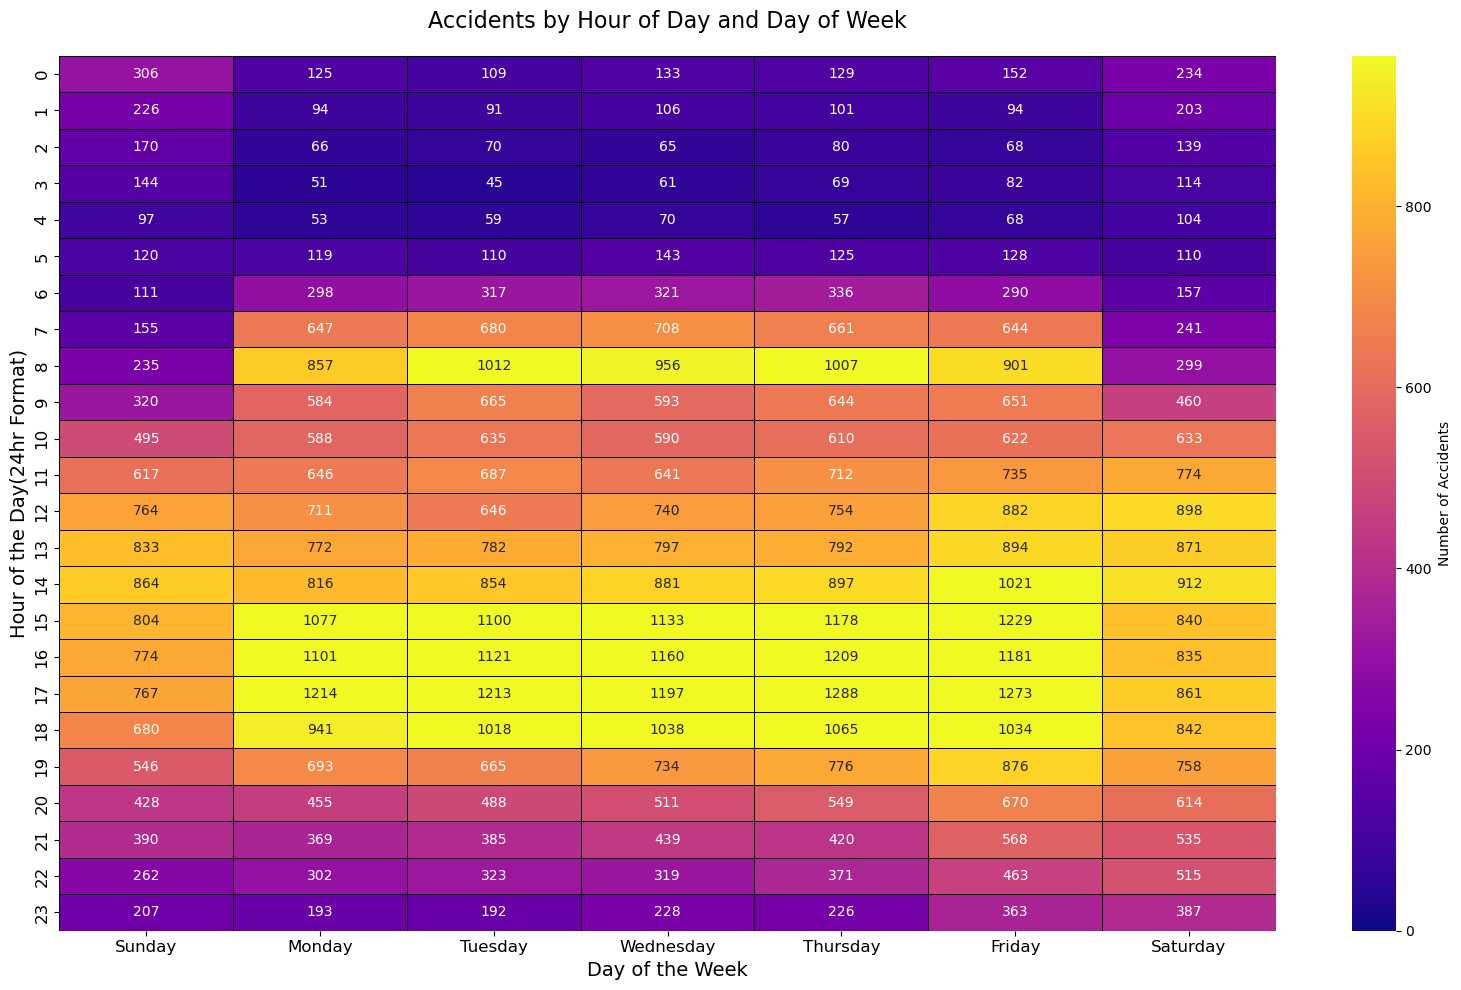

In [48]:
#plotting the heatmap
plt.figure(figsize=(16, 10))  
sns.heatmap(
    hour_day_cross, 
    cmap='plasma',    
    annot=True,         
    fmt='d',            
    linewidths=0.5,     
    linecolor='black',   
    cbar_kws={'label': 'Number of Accidents'},  
    vmin=0, vmax=hour_day_cross.values.max() * 0.75  
)

#labelling the plot
plt.title('Accidents by Hour of Day and Day of Week', fontsize=16, pad=20)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Hour of the Day(24hr Format)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

#displaying the heatmap
plt.show()

- From the heatmap above we can see the hours with the highest accidents marked in yellow, we can also deduce that the hours of 8am and 3pm-6pm have the highest accidents. This makes sense as this are the peak hours of people on the road, 8am signifying people starting the days activities such as going to work and hours between 3pm and 6pm signifying people returning back from the days activities.

- Reduced accident counts between the hours of 12AM - 6AM can also be observed

In [50]:
# total accident counts per day of the week
accidents_per_day = accident_df_2020['actual_weekday'].value_counts().sort_values(ascending=False)

# Displaying the results
print("Total accidents per day of the week:")
print(accidents_per_day)

# Identifying the days with the highest accident count
max_accidents = accidents_per_day.max()
days_with_max_accidents = accidents_per_day[accidents_per_day == max_accidents]

Total accidents per day of the week:
actual_weekday
Friday       14889
Thursday     14056
Wednesday    13564
Tuesday      13267
Monday       12772
Saturday     12336
Sunday       10315
Name: count, dtype: int64


## Visualizing total accidents by day of the week

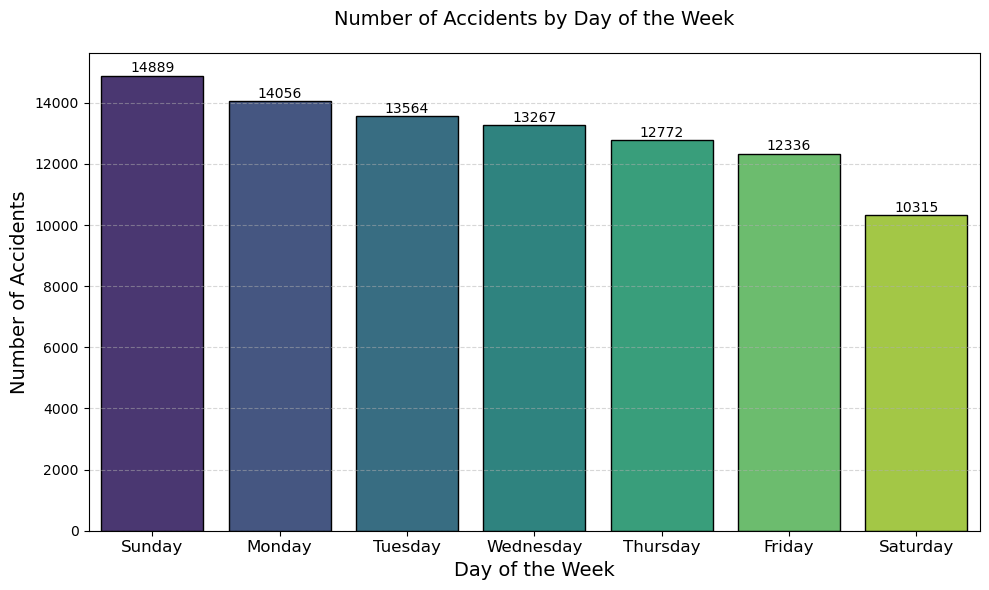

In [52]:
# visualizing total accidents by day of the week
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=days, y=accidents_per_day.values, palette='viridis', edgecolor='black')

# Customizing the plot
ax.set_title('Number of Accidents by Day of the Week', fontsize=14, pad=20)
ax.set_xlabel('Day of the Week', fontsize=14)
ax.set_ylabel('Number of Accidents', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_xticklabels(days, fontsize=12)

# Adding value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height() + 5), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

- The plot shows that Fridays have the highest number of accidents, likely due to heavier traffic as people head out/travel at the end of the workweek. 

- Thursday and Wednesday also have relatively high accident counts, while Sunday sees the fewest, which makes sense given the lower traffic volume on weekends when fewer people are commuting.

## Visualizing total accidents by hour of the week

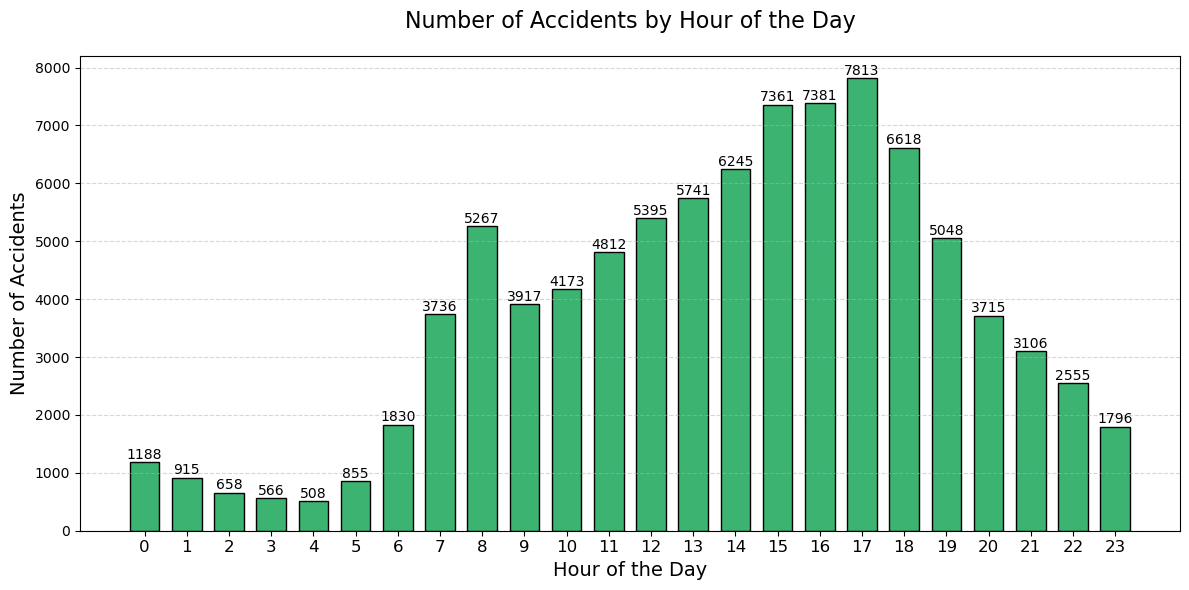

In [55]:
# Aggregating accident counts by hour using the 24 hours format (0 representing 12am)
# Extracting the hour from the time column after conversion to datetime format
accident_df_2020['hour'] = pd.to_datetime(accident_df_2020['time'], errors='coerce').dt.hour

hourly_accidents = accident_df_2020['hour'].value_counts().sort_index()

# Creating the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the bar chart
bars = ax.bar(hourly_accidents.index, hourly_accidents.values, color='mediumseagreen', edgecolor='black', width=0.7)

# Customizing the plot
ax.set_title('Number of Accidents by Hour of the Day', fontsize=16, pad=20)
ax.set_xlabel('Hour of the Day', fontsize=14)
ax.set_ylabel('Number of Accidents', fontsize=14)
ax.set_xticks(np.arange(24))
ax.set_xticklabels(np.arange(24), fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Adding value labels dynamically
for bar in bars:
    height = bar.get_height()
    if height > 0:  # Only label non-zero bars
        ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}', 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

- From the plot above we can deduce that the highest accident count happens at 17:00 (5PM) 

### Identifying the peak accident hours for each day of the week

In [58]:
#calculating the peak accident hours for each day of the week
peak_hours = hour_day_cross.idxmax()  #retrieves the hour with the highest count for each day
peak_values = hour_day_cross.max()   #retrieves the corresponding count

#converting the results into a DataFrame
analysis_peak_hours = pd.DataFrame({
    'Day of the Week': peak_hours.index,
    'Peak Hour': peak_hours.values,
    'Accident Count': peak_values.values
})

#displaying the results 
analysis_peak_hours

Day of the Week  Peak Hour  Accident Count
0          Sunday         14             864
1          Monday         17            1214
2         Tuesday         17            1213
3       Wednesday         17            1197
4        Thursday         17            1288
5          Friday         17            1273
6        Saturday         14             912

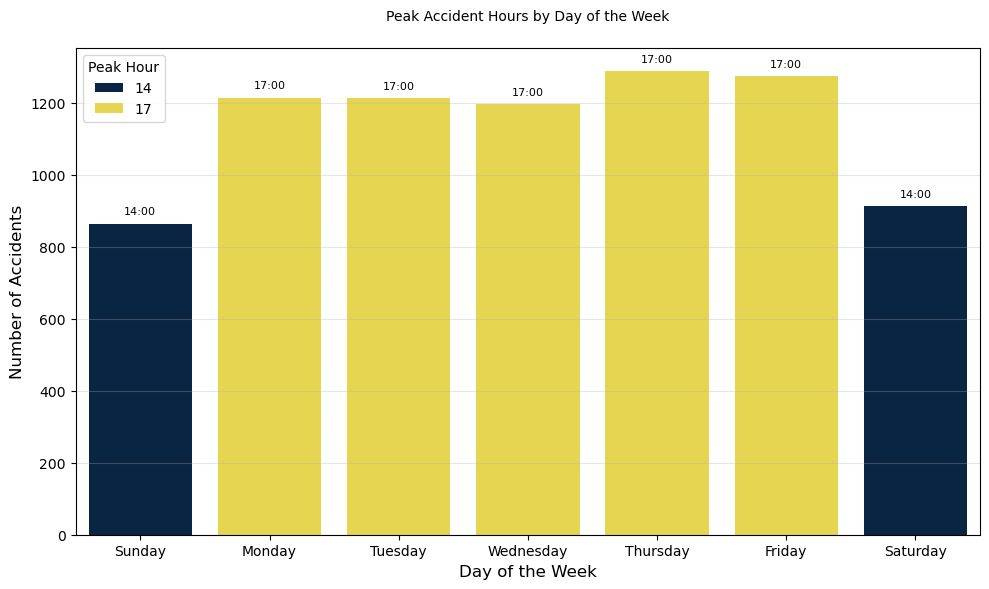

In [59]:
#creating a bar plot to visualize peak accident hours
plt.figure(figsize=(10, 6))  
sns.barplot(
    data=analysis_peak_hours,
    x='Day of the Week',
    y='Accident Count',
    hue='Peak Hour',  
    dodge=False,  
    palette='cividis'  
)

#adding value labels on top of each bar
for i, row in analysis_peak_hours.iterrows():
    plt.text(i, row['Accident Count'] + 20,  
             f"{int(row['Peak Hour'])}:00",  
             ha='center', va='bottom', fontsize=8)

#customizing the plot
plt.title('Peak Accident Hours by Day of the Week', fontsize=10, pad=20)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Peak Hour', fontsize=10, title_fontsize=10, loc='upper left')
plt.grid(axis='y', alpha=0.3) 

#tightening layout to prevent label cutoff
plt.tight_layout()

#displaying the plot
plt.show()

The daily accident peak hours plot shows that on weekdays (Monday to Friday), the highest number of accidents consistently occurs at 5 PM, aligning with evening rush hour traffic. 

On weekends (Saturday and Sunday), the peak shifts to 2 PM, likely due to leisure-related traffic. Weekday peak hours generally have more accidents than weekend peaks.

In conlusion:

- Significant Hours of Accidents: The highest accident rates occur at 5 PM on weekdays and around 2 PM on weekends.

- Significant Days of Accidents: Fridays see the most accidents, while Sundays have the fewest.

- Combined Accident Patterns: Weekdays are dominated by rush-hour accidents (both morning and evening), while weekends experience more midday accidents.

## Question 2 : For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.

In [62]:
#vehicle type column in the vehicle table unique values 
vehicle_df_2020['vehicle_type'].unique()

array([ 9,  8,  3,  2, 11,  1, 90, 19,  4,  5, 21, 97, 20, 98, 10, 17, 23,
       22, 18, 16])

#### Matching the codes using the statistics table 

- Motorcycle under 50cc - 02 (We will use this too to capture under 50cc since Motorcycle 125cc and under is not explicity given in the statistics table, we only have Motorcycle over 50cc and up to 125cc)
- Motorcycle over 50cc and up to 125cc - 03

So essentially for Motorcycle 125cc and under - 02 and 03
- Motorcycle over 125cc and up to 500cc - 04
- Motorcycle over 500cc - 05

In [64]:
# Defining and executing the SQL query
query = """
SELECT 
   a.accident_index,
   CAST(strftime('%H', a.time) AS INTEGER) AS hour, -- Directly cast hour as integer
   a.day_of_week,
   v.vehicle_type
FROM accident a
INNER JOIN vehicle v 
   ON a.accident_index = v.accident_index
WHERE v.vehicle_type IN (2,3, 4, 5)
AND a.accident_year = 2020
"""

motorcycle_accidents = pd.read_sql_query(query, conn)


# Creating the mapping dictionary
#  Replacing values 2 with 3 in the DataFrame
# Motorcycle 50cc and under is represented with 2,so we replace this with 3 to also capture under 50cc
motorcycle_accidents['vehicle_type'].replace({2: 3}, inplace=True)

# Define a simplified dictionary for mapping
motorcycle_types = {
    3: 'Motorcycle 125cc and under',  # Unified key for 2 and 3
    4: 'Motorcycle over 125cc and up to 500cc',
    5: 'Motorcycle over 500cc'
}

# Apply the mapping
motorcycle_accidents['vehicle_type'] = motorcycle_accidents['vehicle_type'].map(motorcycle_types)

actual_weekday = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}

motorcycle_accidents.replace({
    'vehicle_type': motorcycle_types,
    'day_of_week': actual_weekday
}, inplace=True)

#  Renaming column for clarity
motorcycle_accidents.rename(columns={'day_of_week': 'actual_weekday'}, inplace=True)

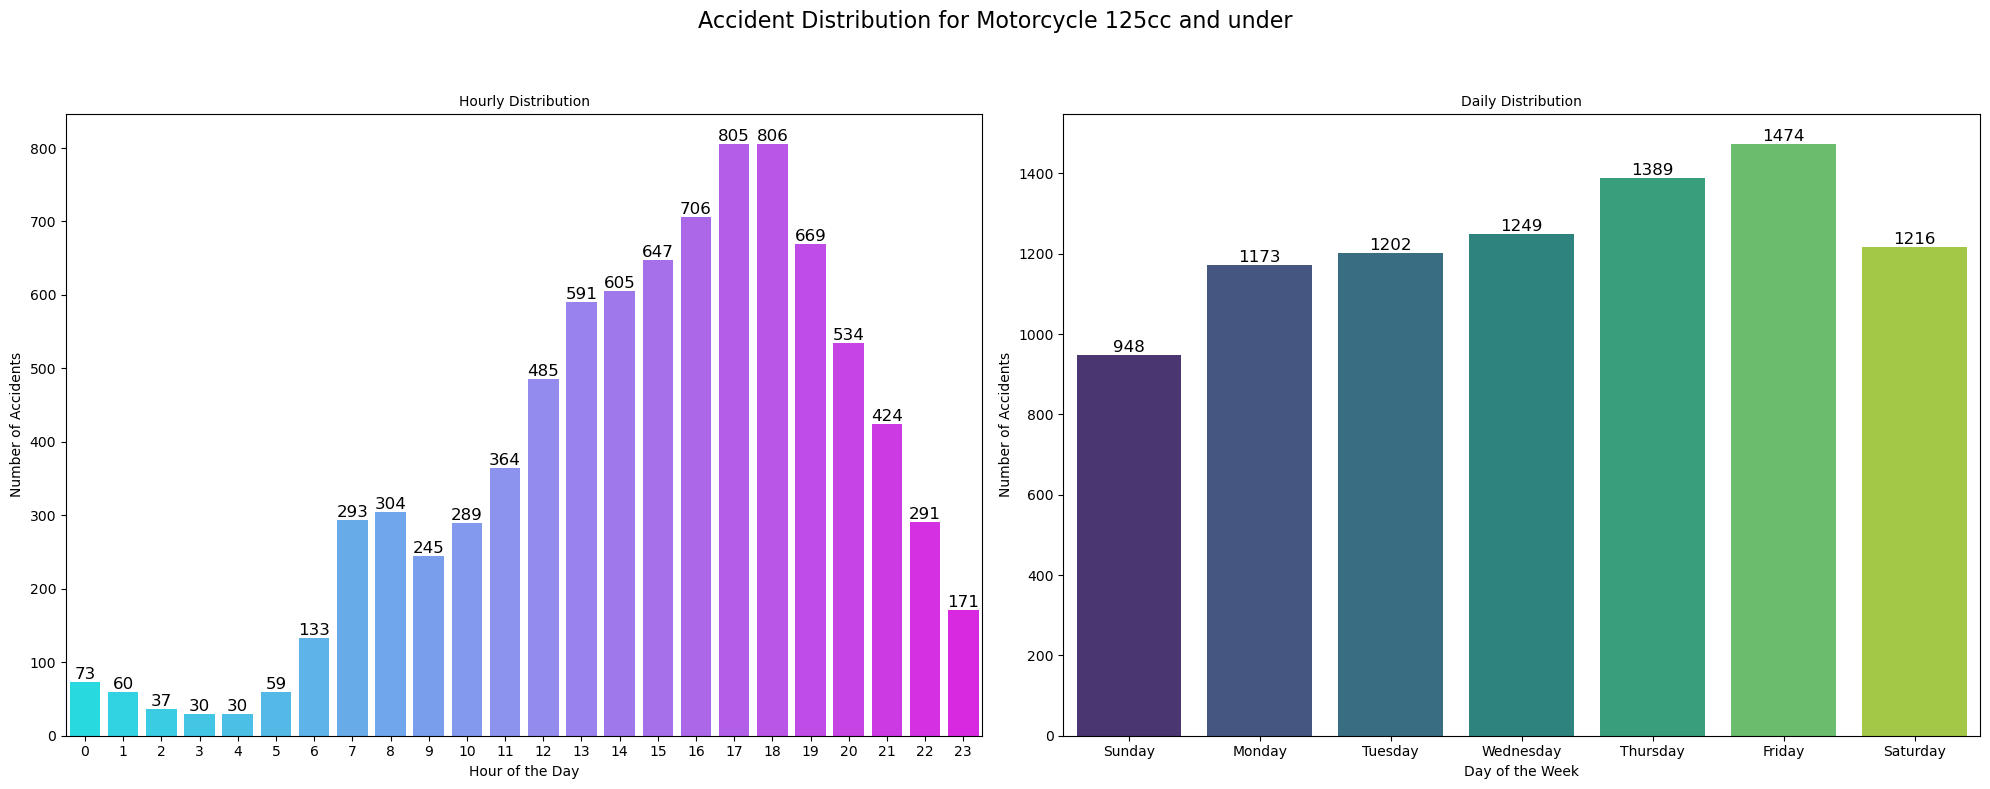

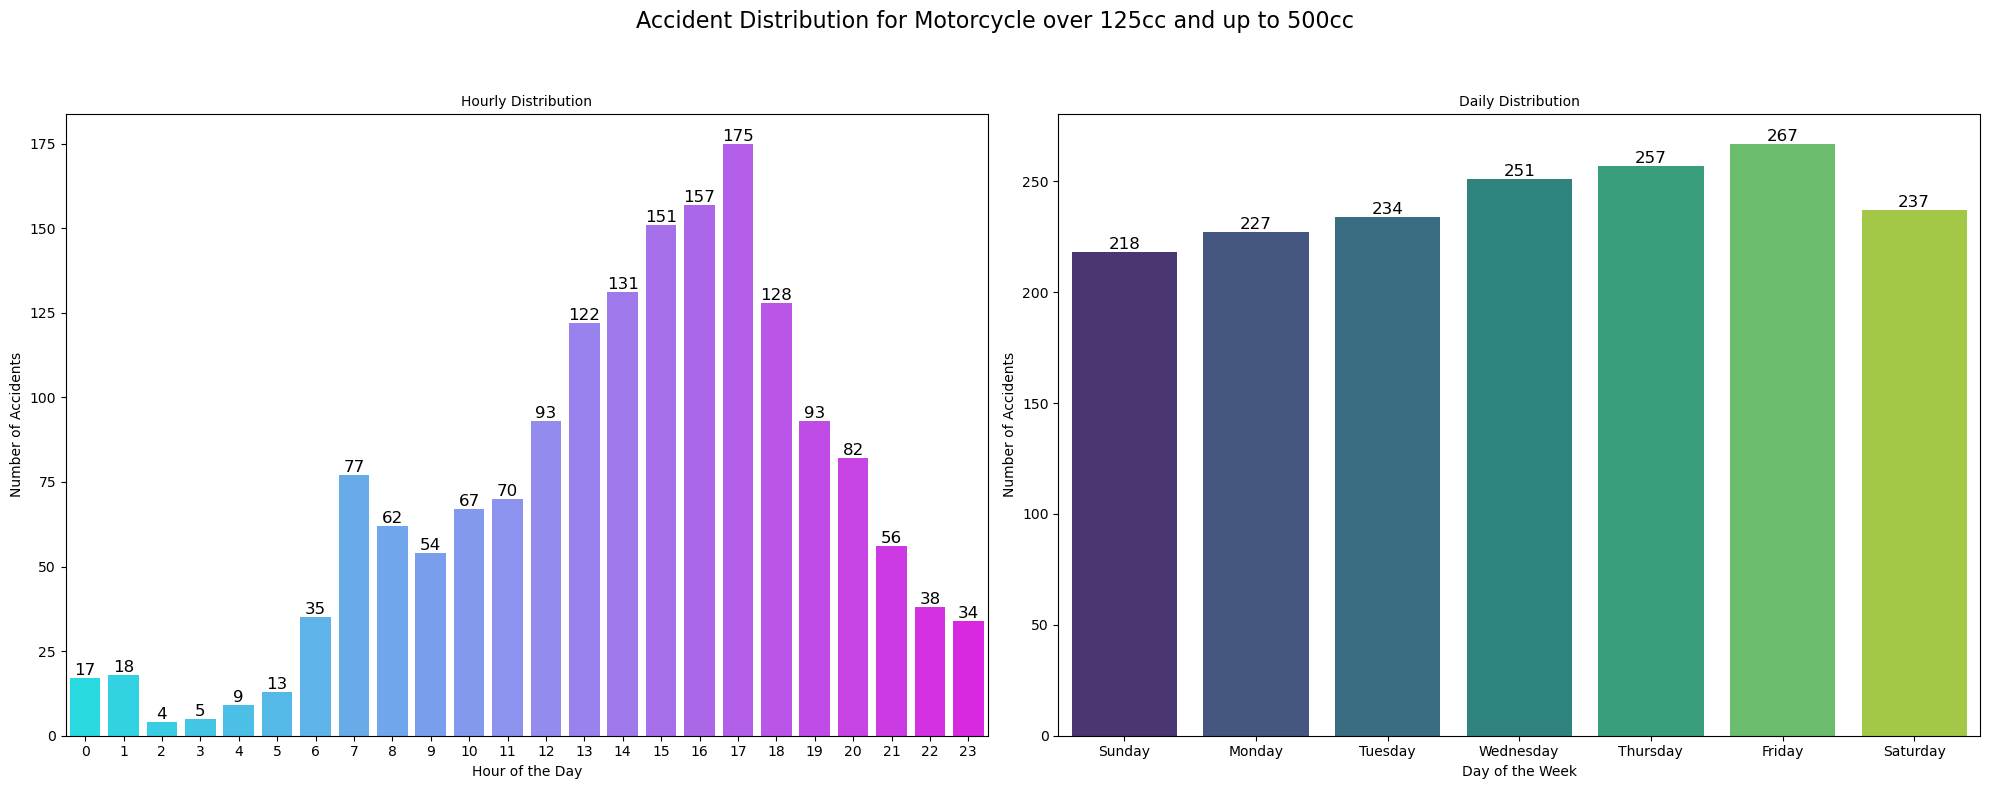

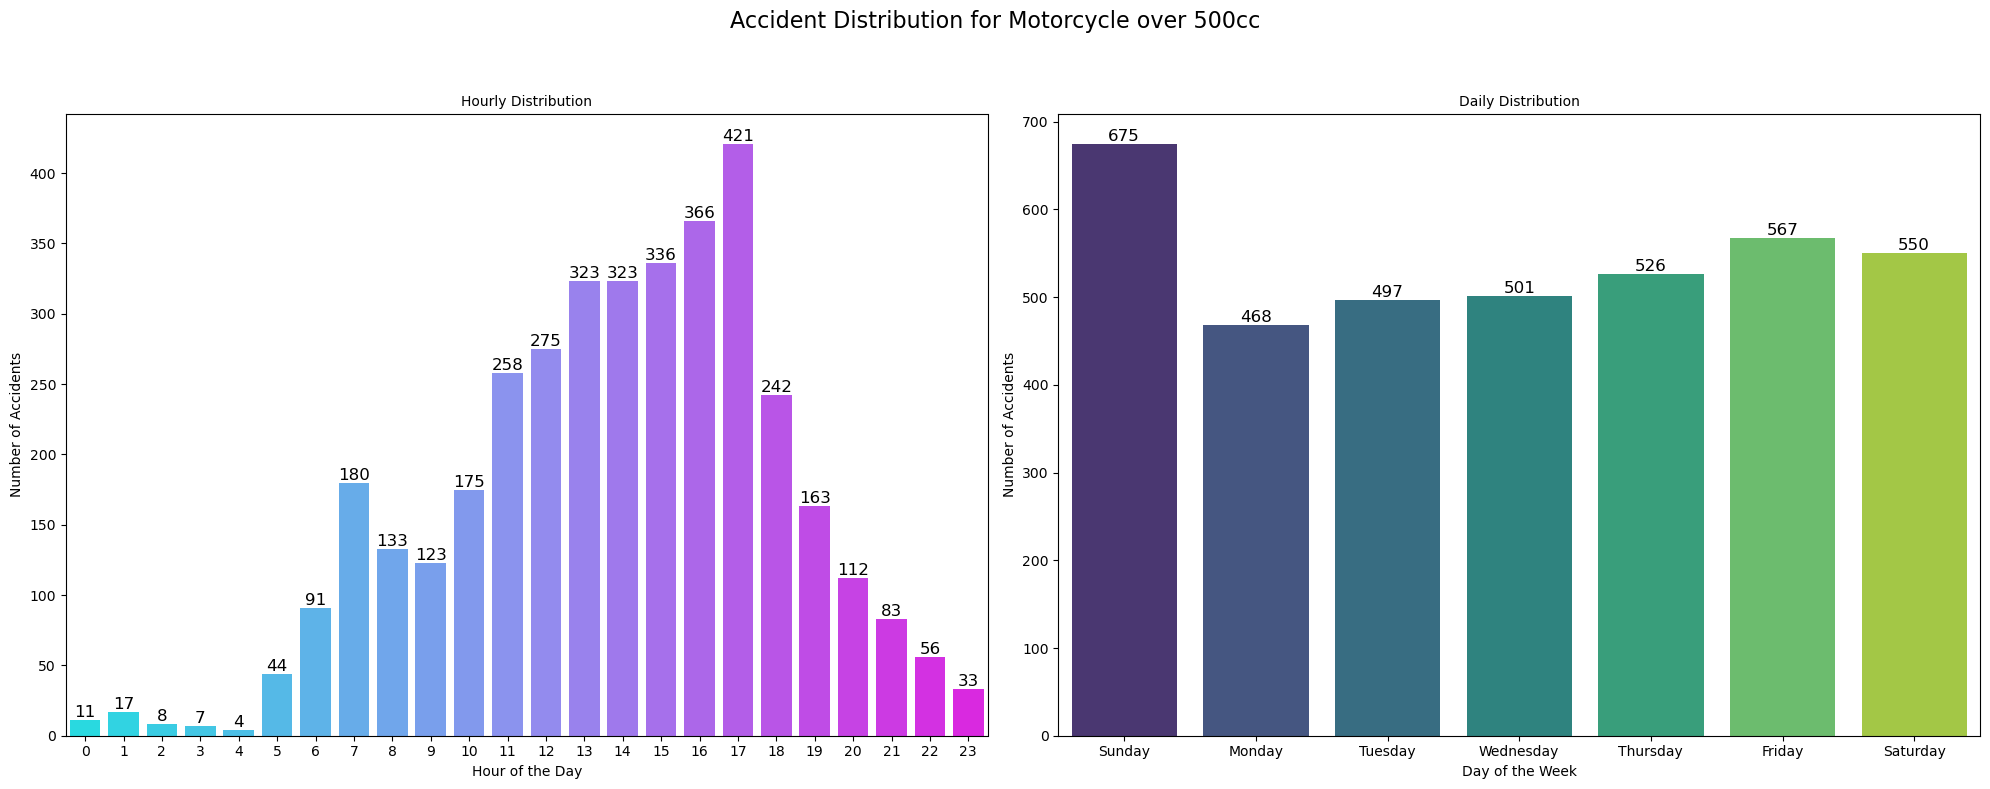

In [65]:
# Loop through each motorcycle type for individual visualizations
for bike_type in motorcycle_types.values():
    # Filter data for the current motorcycle category
    bike_data = motorcycle_accidents[motorcycle_accidents['vehicle_type'] == bike_type]
    
    # Set up subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle(f"Accident Distribution for {bike_type}", fontsize=16)

    # Plot 1: Hourly Distribution
    sns.countplot(
        x="hour",
        data=bike_data,
        palette="cool",
        ax=axes[0]
    )
    axes[0].set_title("Hourly Distribution", fontsize = 10)
    axes[0].set_xlabel("Hour of the Day", fontsize = 10)
    axes[0].set_ylabel("Number of Accidents", fontsize = 10)
    
    # Annotating values on bars
    for bar in axes[0].containers:
        axes[0].bar_label(bar, fontsize=12)

    # Plot 2: Daily Distribution
    sns.countplot(
        x="actual_weekday",
        data=bike_data,
        order= days,
        palette="viridis",
        ax=axes[1]
    )
    axes[1].set_title("Daily Distribution", fontsize = 10)
    axes[1].set_xlabel("Day of the Week", fontsize = 10)
    axes[1].set_ylabel("Number of Accidents", fontsize = 10)
    
    # Annotating values on bars
    for bar in axes[1].containers:
        axes[1].bar_label(bar, fontsize=12)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Space for the main title
    plt.show()

In [66]:
# Grouping by vehicle type, hour, and actual day
hourly_accidents = motorcycle_accidents.groupby(['vehicle_type', 'hour']).size().reset_index(name='Accident Count')
daily_accidents = motorcycle_accidents.groupby(['vehicle_type', 'actual_weekday']).size().reset_index(name='Accident Count')

#  Identifying peak hours and days for each motorcycle type
peak_summary = []

#iterate through motorcycle types
for bike_type in motorcycle_types.values():
    # Filter for current bike type
    bike_hour_data = hourly_accidents[hourly_accidents['vehicle_type'] == bike_type]
    bike_day_data = daily_accidents[daily_accidents['vehicle_type'] == bike_type]

    # Peak hour and day calculations
    peak_hour = bike_hour_data.loc[bike_hour_data['Accident Count'].idxmax()]
    peak_day = bike_day_data.loc[bike_day_data['Accident Count'].idxmax()]

    # Appending results
    peak_summary.append({
        'Motorcycle Type': bike_type,
        'Peak Hour': peak_hour['hour'],
        'Accidents at Peak Hour': peak_hour['Accident Count'],
        'Peak Day': peak_day['actual_weekday'],
        'Accidents on Peak Day': peak_day['Accident Count']
    })

# Converting summary to DataFrame
peak_summary_df = pd.DataFrame(peak_summary)

#  Displaying the summary
print("Summary of Peak Hours and Days for Motorcycle Accidents:")
peak_summary_df

Summary of Peak Hours and Days for Motorcycle Accidents:


Motorcycle Type  Peak Hour  Accidents at Peak Hour  \
0             Motorcycle 125cc and under         18                     806   
1  Motorcycle over 125cc and up to 500cc         17                     175   
2                  Motorcycle over 500cc         17                     421   

  Peak Day  Accidents on Peak Day  
0   Friday                   1474  
1   Friday                    267  
2   Sunday                    675

## Question 3 :For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

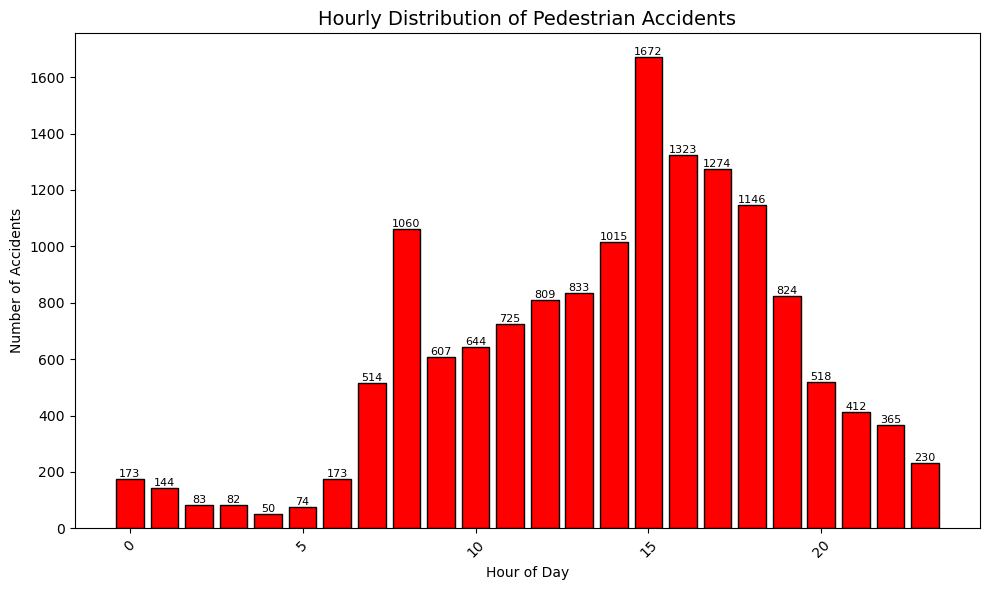

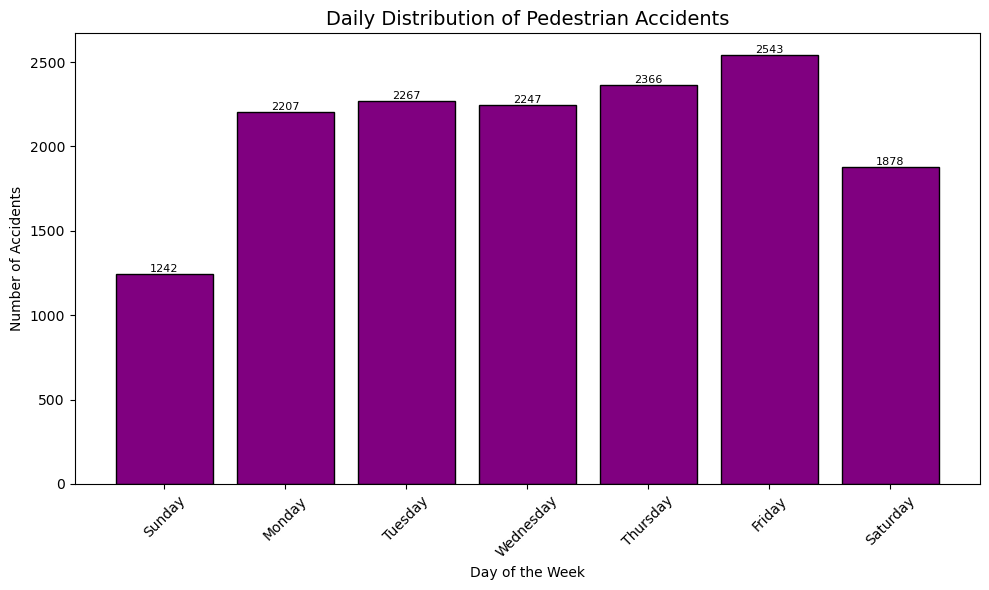

In [68]:
# Define and execute the SQL query
query = """
SELECT 
   a.accident_index,
   CAST(strftime('%H', a.time) AS INTEGER) AS hour,
   a.day_of_week,
   c.casualty_class
FROM accident a
INNER JOIN casualty c 
   ON a.accident_index = c.accident_index
WHERE c.casualty_class = 3
AND a.accident_year = 2020
"""

pedestrian_accidents = pd.read_sql_query(query, conn)

#  Mapping the day of week
pedestrian_accidents['actual_weekday'] = pedestrian_accidents['day_of_week'].map(actual_weekday)

# Defining a function for Plotting
def plot_distribution(data, column, title, xlabel, ylabel, color, order=None):
    plt.figure(figsize=(10, 6))
    counts = data[column].value_counts().sort_index() if not order else data[column].value_counts().reindex(order, fill_value=0)
    bars = plt.bar(counts.index, counts.values, color=color, edgecolor='black')
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.xticks(rotation=45, fontsize=10)

    # Annotate values
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

# Visualize hourly and daily distributions
plot_distribution(
    pedestrian_accidents, 
    'hour', 
    'Hourly Distribution of Pedestrian Accidents', 
    'Hour of Day', 
    'Number of Accidents', 
    'Red'
)

plot_distribution(
    pedestrian_accidents, 
    'actual_weekday', 
    'Daily Distribution of Pedestrian Accidents', 
    'Day of the Week', 
    'Number of Accidents', 
    'Purple', 
    order= days
)

# Visualizing using the Heatmap

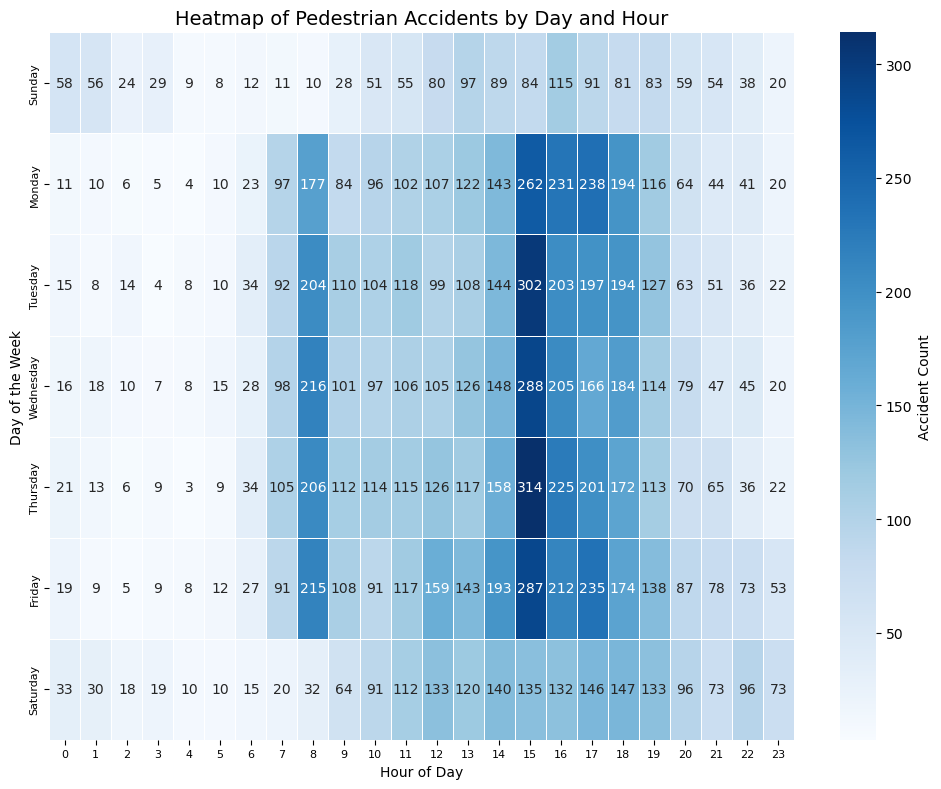

In [70]:
heatmap_data = pedestrian_accidents.groupby(['actual_weekday', 'hour']).size().unstack(fill_value=0)
heatmap_data = heatmap_data.reindex(days)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data, 
    cmap='Blues', 
    annot=True, 
    fmt='.0f', 
    
    linewidths=0.5, 
    cbar_kws={'label': 'Accident Count'}
)
#setting labels for the heatmap
plt.title('Heatmap of Pedestrian Accidents by Day and Hour', fontsize=14)
plt.xlabel('Hour of Day', fontsize=10)
plt.ylabel('Day of the Week', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [71]:
summary = []

#hourly distribution
hourly_distribution = pedestrian_accidents['hour'].value_counts().sort_index()

#daily distribution
daily_distribution = pedestrian_accidents['actual_weekday'].value_counts().reindex(
    ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],fill_value=0)
    

# Identify peak hour and day for pedestrian accidents
peak_hour = hourly_distribution.idxmax()
count_peakhour = hourly_distribution.max()
peak_day = daily_distribution.idxmax()
count_peakday = daily_distribution.max()

summary.append({
    'Peak Hour': peak_hour,
    'Accidents at Peak Hour': count_peakhour,
    'Peak Day': peak_day,
    'Accidents on Peak Day': count_peakday
})
#converting to DataFrame for display
peak_summary_df = pd.DataFrame(summary)
peak_summary_df

Peak Hour  Accidents at Peak Hour Peak Day  Accidents on Peak Day
0         15                    1672   Friday                   2543

#### Insigths gained from the plots
- Pedestrian accidents are most frequent between 3 PM and 4PM (15:00-16:00), and are highest on Fridays.

## Question 4 : Using the apriori algorithm, explore the impact of selected variables on accident severity.

In [74]:
#!pip install mlxtend

In [75]:
#importing the necessary libraries
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [76]:
accident_df_2020

accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
1      2020010220496           2020          010220496               529337.0   
2      2020010228005           2020          010228005               526432.0   
3      2020010228006           2020          010228006               538676.0   
4      2020010228011           2020          010228011               529324.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    175144.0  -0.254001  51.462262             1   
1                    176237.0  -0.139253  51.470327             1   
2                    182761.0  -0.178719  51.529614             1   
3                    184371.0  -0.001683  51.541210             1   
4                    181286.0  -0.137592  51.515704             1   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  ...  weather_conditions  \
0                      3                   1  ...                   9   
1                      3                   1  ...                   1   
2                      3                   1  ...                   1   
3                      2                   1  ...                   1   
4                      3                   1  ...                   1   
...                  ...                 ...  ...                 ...   
91194                  2                   2  ...                   1   
91195                  3                   1  ...                   1   
91196                  2                   2  ...                   1   
91197                  3                   2  ...                   1   
91198                  3                   1  ...                   1   

      road_surface_conditions  special_conditions_at_site carriageway_hazards  \
0                           9                           0                   0   
1                           1                           0                   0   
2                           2                           0                   0   
3                           1                           0                   0   
4                           1                           0                   0   
...                       ...                         ...                 ...   
91194                       1                           0                   0   
91195                       1                           0                   0   
91196                       1                           0                   0   
91197                       1                           0                   0   
91198                       1                           0                   2   

       urban_or_rural_area did_police_officer_attend_scene_of_accident  \
0                        1                                           3   
1                        1                                           1   
2                        1                                           1   
3                        1                                

In [77]:
#SQL Query to filter and join the necessary columns
query = """
SELECT 
    a.accident_severity,
    a.road_type,
    a.light_conditions,
    a.speed_limit,
    a.road_surface_conditions,
    a.urban_or_rural_area,
    a.weather_conditions,
    v.vehicle_type,
    v.vehicle_manoeuvre,
    c.pedestrian_location,
    c.casualty_class
    
FROM accident a
JOIN casualty c ON a.accident_index = c.accident_index
JOIN vehicle v ON a.accident_index = v.accident_index
WHERE a.accident_year = 2020
"""

#loading results into a Pandas DataFrame
apriori_df = pd.read_sql_query(query, conn)

#displaying the results
apriori_df.head()

accident_severity  road_type  light_conditions  speed_limit  \
0                  3          6                 1           20   
1                  3          6                 1           20   
2                  3          6                 1           20   
3                  3          6                 4           30   
4                  2          6                 4           30   

   road_surface_conditions  urban_or_rural_area  weather_conditions  \
0                        9                    1                   9   
1                        1                    1                   1   
2                        1                    1                   1   
3                        2                    1                   1   
4                        1                    1                   1   

   vehicle_type  vehicle_manoeuvre  pedestrian_location  casualty_class  
0             9                  5                    9               3  
1             9                  4                    1               3  
2             9                  4                    1               3  
3             9                 18                    5               3  
4             8                 18                    4               3

## Data Cleaning and Mapping

In [79]:
#!pip install openpyxl

- Please run the code above which installs openxyl before running the code below

In [81]:
# Remove rows with missing values (-1)
apriori_df = apriori_df[~(apriori_df == -1).any(axis=1)].copy()


# Reading the Excel file to use for the mappings
mappings_df = pd.read_excel('dft-road-casualty-statistics-road-safety-open-dataset-data-guide-2023-1.xlsx')


# Clean column values
apriori_df = apriori_df.astype(str).apply(lambda col: col.str.strip())

# Cleaning the mapping file
mappings_df['field name'] = mappings_df['field name'].astype(str).str.strip()
mappings_df['code/format'] = mappings_df['code/format'].astype(str).str.strip()
mappings_df['label'] = mappings_df['label'].astype(str).str.strip()


# Recreate mapping dictionary
category_mappings = {
    field: dict(zip(group['code/format'], group['label']))
    for field, group in mappings_df.groupby('field name')
}

def map_column(column):
    mapping = category_mappings.get(column.name)
    if mapping:
        return column.map(mapping).fillna(column)
    return column

apriori_mapped = apriori_df.apply(map_column)
apriori_mapped

accident_severity           road_type       light_conditions  \
0                 Slight  Single carriageway               Daylight   
1                 Slight  Single carriageway               Daylight   
2                 Slight  Single carriageway               Daylight   
3                 Slight  Single carriageway  Darkness - lights lit   
4                Serious  Single carriageway  Darkness - lights lit   
...                  ...                 ...                    ...   
220430           Serious  Single carriageway               Daylight   
220431           Serious  Single carriageway               Daylight   
220432            Slight  Single carriageway               Daylight   
220433            Slight  Single carriageway               Daylight   
220434            Slight  Single carriageway               Daylight   

       speed_limit  road_surface_conditions urban_or_rural_area  \
0               20  unknown (self reported)               Urban   
1               20                      Dry               Urban   
2               20                      Dry               Urban   
3               30              Wet or damp               Urban   
4               30                      Dry               Urban   
...            ...                      ...                 ...   
220430          60                      Dry               Rural   
220431          60                      Dry               Rural   
220432          30                      Dry               Urban   
220433          30                      Dry               Urban   
220434          30                      Dry               Urban   

        weather_conditions           vehicle_type           vehicle_manoeuvre  \
0                  Unknown                    Car                  Moving off   
1       Fine no high winds                    Car         Slowing or stopping   
2       Fine no high winds                    Car         Slowing or stopping   
3       Fine no high winds                    Car           Going ahead other   
4       Fine no high winds  Taxi/Private hire car           Going ahead other   
...                    ...                    ...                         ...   
220430  Fine no high winds  Motorcycle over 500cc  Going ahead left-hand bend   
220431  Fine no high winds                    Car                Turning left   
220432  Fine no high winds            Pedal cycle           Going ahead other   
220433  Fine no high winds                    Car                Turning left   
220434  Fine no high winds                    Car                   Reversing   

                                      pedestrian_location   casualty_class  
0                            In carriageway, not crossing       Pedestrian  
1                Crossing on pedestrian crossing facility       Pedestrian  
2                Crossing on pedestrian crossing facility       Pedestrian  
3                      In carriageway, crossing elsewhere       Pedestrian  
4       Crossing elsewhere within 50m. of pedestrian c...       Pedestrian  
...                                                   ...              ...  
220430                                   Not a Pedestrian  Driver or rider  
220431                                   Not a Pedestrian  Driver or rider  
220432                                   Not a Pedestrian  Driver or rider  
220433                                   Not a Pedestrian  Driver or rider  
220434                       In carriageway, not crossing       Pedestrian  

[219117 rows x 11 columns]

In [82]:
#selecting the variables to compare impact on accident_severity for the apriori algorithm

categorical_cols = [
    "accident_severity", "weather_conditions", "light_conditions", "road_type",
    "speed_limit", "road_surface_conditions", "urban_or_rural_area", "vehicle_type",
    "vehicle_manoeuvre", "casualty_class", "pedestrian_location"
]

# encode all selected columns
apriori_encoded = pd.get_dummies(apriori_mapped, columns=categorical_cols, dtype=int)

#Calling the variable to see if the data has been encoded
apriori_encoded

accident_severity_Fatal  accident_severity_Serious  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          1   
...                         ...                        ...   
220430                        0                          1   
220431                        0                          1   
220432                        0                          0   
220433                        0                          0   
220434                        0                          0   

        accident_severity_Slight  weather_conditions_Fine + high winds  \
0                              1                                     0   
1                              1                                     0   
2                              1                                     0   
3                              1                                     0   
4                              0                                     0   
...                          ...                                   ...   
220430                         0                                     0   
220431                         0                                     0   
220432                         1                                     0   
220433                         1                                     0   
220434                         1                                     0   

        weather_conditions_Fine no high winds  weather_conditions_Fog or mist  \
0                                           0                               0   
1                                           1                               0   
2                                           1                               0   
3                                           1                               0   
4                                           1                               0   
...                                       ...                             ...   
220430                                      1                               0   
220431                                      1                               0   
220432                                      1                               0   
220433                                      1                               0   
220434                                      1                               0   

        weather_conditions_Other  weather_conditions_Raining + high winds  \
0                              0                                        0   
1                              0                                        0   
2                              0                                        0   
3                              0                                        0   
4                              0                                        0   
...                          ...                                      ...   
220430                         0                                        0   
220431                         0                                        0   
220432                         0                                        0   
220433                         0                                        0   
220434                         0                                        0   

        weather_conditions_Raining no high winds  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
220430                                         0   
220431                                         0   
220432  

In [83]:
#setting thresholds
min_support = 0.1  # patterns that appear in at least 10% of the dataset to capture rare but important patterns 
min_confidence = 0.7  # rules where the consequent occurs at least 70% of the time when the antecedent is true.

#applying Apriori Algorithm
freq_items= apriori(apriori_encoded,min_support= min_support, use_colnames = True)


#association rules generation
rules = association_rules(freq_items, metric="confidence", min_threshold=min_confidence,support_only=False,num_itemsets=len(freq_items))
rules_confidence= association_rules(freq_items, metric = "confidence", min_threshold = min_confidence)


#rules by lift
rules= rules_confidence.sort_values('lift', ascending=False)


#saving rules related to accident severity for more analysis
rules_severity= rules[rules['consequents'].apply(lambda x: any('accident_severity' in item for item in x))]

print(f"Total number of rules: {len(rules)}")
print(f"Number of rules with impact on accident severity: {len(rules_severity)}")

#displaying the rules
pd.set_option('display.max_columns', None)
rules_severity

/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Total number of rules: 9945
Number of rules with impact on accident severity: 1557


antecedents  \
9499  (light_conditions_Daylight, vehicle_type_Car, ...   
8609  (casualty_class_Driver or rider, road_surface_...   
9696  (road_surface_conditions_Dry, light_conditions...   
6243  (casualty_class_Driver or rider, speed_limit_3...   
8527  (casualty_class_Driver or rider, speed_limit_3...   
...                                                 ...   
892   (urban_or_rural_area_Rural, weather_conditions...   
1227  (road_surface_conditions_Dry, urban_or_rural_a...   
2642  (road_surface_conditions_Dry, urban_or_rural_a...   
155   (urban_or_rural_area_Rural, weather_conditions...   
249   (road_surface_conditions_Dry, urban_or_rural_a...   

                                            consequents  antecedent support  \
9499  (road_surface_conditions_Dry, accident_severit...            0.176832   
8609  (urban_or_rural_area_Urban, accident_severity_...            0.186645   
9696  (urban_or_rural_area_Urban, accident_severity_...            0.144343   
6243  (urban_or_rural_area_Urban, accident_severity_...            0.265091   
8527  (urban_or_rural_area_Urban, accident_severity_...            0.186918   
...                                                 ...                 ...   
892                          (accident_severity_Slight)            0.270285   
1227                         (accident_severity_Slight)            0.223447   
2642                         (accident_severity_Slight)            0.212631   
155                          (accident_severity_Slight)            0.278203   
249                          (accident_severity_Slight)            0.230379   

      consequent support   support  confidence      lift  representativity  \
9499            0.499719  0.133705    0.756110  1.513070               1.0   
8609            0.481487  0.135083    0.723745  1.503145               1.0   
9696            0.481487  0.104186    0.721797  1.499100               1.0   
6243            0.481487  0.191327    0.721740  1.498981               1.0   
8527            0.481487  0.134864    0.721513  1.498509               1.0   
...                  ...       ...         ...       ...               ...   
892             0.776991  0.190145    0.703499  0.905414               1.0   
1227            0.776991  0.157003    0.702641  0.904310               1.0   
2642            0.776991  0.149254    0.701938  0.903405               1.0   
155             0.776991  0.195019    0.700996  0.902193               1.0   
249             0.776991  0.161466    0.700872  0.902033               1.0   

      leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
9499  0.045338    2.051257       0.411935  0.246303   0.512494    0.511835  
8609  0.045216    1.876936       0.411540  0.253416   0.467217    0.502149  
9696  0.034687    1.863794       0.389096  0.199727   0.463460    0.469091  
6243  0.063689    1.863413       0.452955  0.344577   0.463350    0.559554  
8527  0.044865    1.861892       0.409147  0.252771   0.462912    0.500806  
...        ...         ...            ...       ...        ...         ...  
892  -0.019864    0.752134      -0.125233  0.221839  -0.329551    0.474109  
1227 -0.016613    0.749964      -0.119922  0.186147  -0.333397    0.452353  
2642 -0.015959    0.748196      -0.119561  0.177605  -0.336548    0.447015  
155  -0.021142    0.745838      -0.130583  0.226720  -0.340774    0.475994  
249  -0.017536    0.745528      -0.123666  0.190880  -0.341330    0.454341  

[1557 rows x 14 columns]

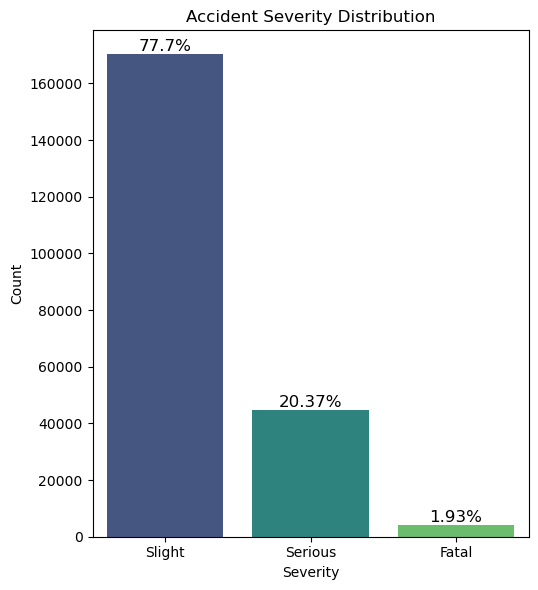

In [101]:
#visualizing the distribution of accident severity 
plt.figure(figsize=(10, 6))
 
#calculating the severity distribution
distribution_sev = apriori_mapped['accident_severity'].value_counts()
total = distribution_sev.sum()  
percentage = (distribution_sev / total * 100).round(2)  
 
#plotting the distribution
plt.subplot(1, 2, 1)
sns.barplot(x=distribution_sev.index, y=distribution_sev.values, palette='viridis')
plt.title('Accident Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Count')

 
#adding percentages to the bars 
for index, value in enumerate(distribution_sev.values):
    plt.text(index, value + 5, f"{percentage[index]}%", ha='center', va='bottom', fontsize=12)
 
plt.tight_layout()
plt.show()

In [103]:
#analyzing the top 3 rules for each severity level
for severity in ['Fatal', 'Serious', 'Slight']:
    
    #filtering the severity rules for each level
    severity_rules = rules[rules['consequents'].apply(lambda x: f'accident_severity_{severity}' in x)]
   
    #select the top 3 rules- by lift
    severity_rules_top = severity_rules.sort_values(by='lift', ascending=False).head(3)
    
    if not severity_rules_top.empty:
        print(f"\nTop 3 Rules for {severity} Accidents:")
          
        
        #looping through each rule 
        for idx, rule in severity_rules_top.iterrows():
            print(f"Rule {idx + 1}:")
            print(f"  Antecedent: {list(rule['antecedents'])}")
            print(f"  Consequent: {list(rule['consequents'])}")
            print(f"  Support: {rule['support']:.3f}")
            print(f"  Confidence: {rule['confidence']:.3f}")
            print(f"  Lift: {rule['lift']:.3f}") 


Top 3 Rules for Slight Accidents:
Rule 9500:
  Antecedent: ['light_conditions_Daylight', 'vehicle_type_Car', 'urban_or_rural_area_Urban', 'casualty_class_Driver or rider', 'weather_conditions_Fine no high winds']
  Consequent: ['road_surface_conditions_Dry', 'accident_severity_Slight', 'pedestrian_location_Not a Pedestrian']
  Support: 0.134
  Confidence: 0.756
  Lift: 1.513
Rule 8610:
  Antecedent: ['casualty_class_Driver or rider', 'road_surface_conditions_Dry', 'vehicle_type_Car', 'speed_limit_30']
  Consequent: ['urban_or_rural_area_Urban', 'accident_severity_Slight', 'pedestrian_location_Not a Pedestrian']
  Support: 0.135
  Confidence: 0.724
  Lift: 1.503
Rule 9697:
  Antecedent: ['road_surface_conditions_Dry', 'light_conditions_Daylight', 'vehicle_type_Car', 'speed_limit_30', 'casualty_class_Driver or rider']
  Consequent: ['urban_or_rural_area_Urban', 'accident_severity_Slight', 'pedestrian_location_Not a Pedestrian']
  Support: 0.104
  Confidence: 0.722
  Lift: 1.499


## Question 5 : Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region?

In [106]:
#SQL query to filter for the regions for analysis
sql_query = """
SELECT 
    accident_index, longitude, latitude, accident_severity, day_of_week, strftime('%H', time) as hour, weather_conditions, road_type, speed_limit, light_conditions
FROM accident
WHERE local_authority_district IN (228, 231) -- Kingston upon Hull,East Riding of Yorkshire
AND police_force = 16 --- Humberside
AND accident_year = 2020
"""

#loading the data into a DataFrame
region_data = pd.read_sql_query(sql_query, conn)
region_data

accident_index  longitude   latitude  accident_severity  day_of_week  \
0     2020160914781  -0.331047  53.747751                  2            4   
1     2020160914930  -0.393424  53.744936                  3            5   
2     2020160915028  -0.324858  53.791630                  2            5   
3     2020160915047  -0.327733  53.767805                  3            5   
4     2020160915332  -0.309102  53.750410                  3            5   
...             ...        ...        ...                ...          ...   
1093  2020161013646  -0.438783  53.776745                  3            3   
1094  2020161013730  -0.343885  53.781494                  3            6   
1095  2020161014528  -0.424674  53.839482                  3            5   
1096  2020161014544  -0.308880  53.782750                  3            5   
1097  2020161014949  -0.342063  53.742609                  3            3   

     hour  weather_conditions  road_type  speed_limit  light_conditions  
0      02                   1          6           30                 4  
1      11                   1          6           30                 1  
2      17                   1          6           30                 4  
3      21                   1          3           30                 4  
4      12                   1          6           30                 1  
...   ...                 ...        ...          ...               ...  
1093   16                   1          6           30                 4  
1094   14                   1          3           30                 1  
1095   16                   1          6           30                 4  
1096   09                   1          6           30                 1  
1097   20                   1          6           30                 4  

[1098 rows x 10 columns]

In [107]:
#checking for null/missing values
region_data.isnull().sum()

accident_index        0
longitude             0
latitude              0
accident_severity     0
day_of_week           0
hour                  0
weather_conditions    0
road_type             0
speed_limit           0
light_conditions      0
dtype: int64

In [109]:
#filtering variables for clustering
input_features = region_data[['longitude', 'latitude', 'accident_severity']]
input_features

longitude   latitude  accident_severity
0     -0.331047  53.747751                  2
1     -0.393424  53.744936                  3
2     -0.324858  53.791630                  2
3     -0.327733  53.767805                  3
4     -0.309102  53.750410                  3
...         ...        ...                ...
1093  -0.438783  53.776745                  3
1094  -0.343885  53.781494                  3
1095  -0.424674  53.839482                  3
1096  -0.308880  53.782750                  3
1097  -0.342063  53.742609                  3

[1098 rows x 3 columns]

## Applying Clustering (K-Means)

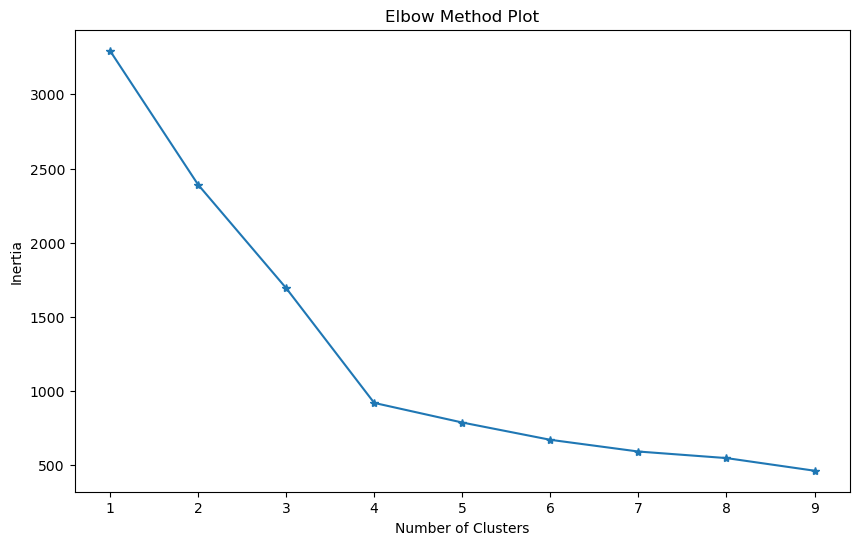

In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#standardizing the clustering variables
scaler = StandardScaler()
standardized_variables = scaler.fit_transform(input_features)

#Using the elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(standardized_variables)
    inertia.append(kmeans.inertia_)

#plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertia, marker='*')
plt.title('Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [114]:
#optimal number of clusters with K-Means
optimal_clust = 4  #from the eblow method

kmeans = KMeans(n_clusters=optimal_clust, random_state=42)
region_data['Cluster'] = kmeans.fit_predict(standardized_variables)

#displaying the clusters
region_data[['longitude', 'latitude', 'Cluster']]

longitude   latitude  Cluster
0     -0.331047  53.747751        3
1     -0.393424  53.744936        1
2     -0.324858  53.791630        3
3     -0.327733  53.767805        1
4     -0.309102  53.750410        1
...         ...        ...      ...
1093  -0.438783  53.776745        1
1094  -0.343885  53.781494        1
1095  -0.424674  53.839482        1
1096  -0.308880  53.782750        1
1097  -0.342063  53.742609        1

[1098 rows x 3 columns]

/var/folders/1p/p4_3f7rx0b3745pny_1zkshh0000gn/T/ipykernel_43747/3652933125.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', optimal_clust)


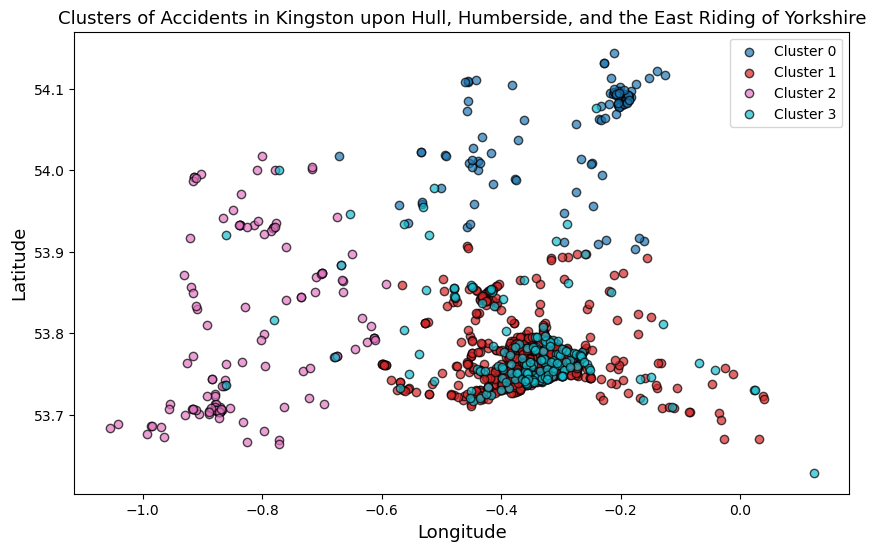

In [125]:
cmap = cm.get_cmap('tab10', optimal_clust) 

# Plotting the clusters
plt.figure(figsize=(10, 6))

for cluster in range(optimal_clust):
    clusters = region_data[region_data['Cluster'] == cluster]
    plt.scatter(
        clusters['longitude'], clusters['latitude'], 
        color=cmap(cluster), 
        label=f'Cluster {cluster}', 
        alpha=0.7, edgecolors='black'
    )

# Customizing plot
plt.title('Clusters of Accidents in Kingston upon Hull, Humberside, and the East Riding of Yorkshire', fontsize=13)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.legend()
plt.show()

In [129]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Silhouette Score
silhouette_score = silhouette_score(standardized_variables, region_data['Cluster'])
print(f"Silhouette Score: {silhouette_score}")

# Calculate Davies-Bouldin Index (DBI)
dbi = davies_bouldin_score(standardized_variables, region_data['Cluster'])
print(f"Davies-Bouldin Index: {dbi}")


Silhouette Score: 0.628876139393181
Davies-Bouldin Index: 0.7066911561268057


In [131]:
# cluster characteristics details
cluster_details = (
    region_data.groupby('Cluster')
    .agg({'longitude': 'mean', 'latitude': 'mean', 'accident_severity': 'count'})
    .rename(columns={'longitude': 'Mean Longitude', 'latitude': 'Mean Latitude', 'accident_severity': 'Total Accidents'})
    .reset_index()
)

# Adding severity counts
severity = (
    region_data.groupby(['Cluster', 'accident_severity'])
    .size()
    .unstack(fill_value=0)
    .rename(columns={1: 'Fatal Accidents', 2: 'Serious Accidents', 3: 'Slight Accidents'})
    .reset_index()
)

# Merging summaries
cluster_details = cluster_details.merge(severity, on='Cluster', how='left')

# Display summary
print(cluster_details)

# Interpreting results
for cluster_info, cluster_data in region_data.groupby('Cluster'):
    print(f"\nCluster {cluster_info}:")
    print(f"  Number of accidents: {len(cluster_data)}")
    print(f"  Slight accidents: {cluster_data['accident_severity'].eq(3).sum()}")
    print(f"  Fatal accidents: {cluster_data['accident_severity'].eq(1).sum()}")
    print(f"  Serious accidents: {cluster_data['accident_severity'].eq(2).sum()}")
    print(f"  Most common weather condition: {cluster_data['weather_conditions'].mode()[0]}")

   Cluster  Mean Longitude  Mean Latitude  Total Accidents  Fatal Accidents  \
0        0       -0.289171      54.050331              106                0   
1        1       -0.354632      53.765538              691                0   
2        2       -0.821076      53.801225              128                0   
3        3       -0.358144      53.779942              173               19   

   Serious Accidents  Slight Accidents  
0                 18                88  
1                  0               691  
2                 30                98  
3                154                 0  

Cluster 0:
  Number of accidents: 106
  Slight accidents: 88
  Fatal accidents: 0
  Serious accidents: 18
  Most common weather condition: 1

Cluster 1:
  Number of accidents: 691
  Slight accidents: 691
  Fatal accidents: 0
  Serious accidents: 0
  Most common weather condition: 1

Cluster 2:
  Number of accidents: 128
  Slight accidents: 98
  Fatal accidents: 0
  Serious accidents: 30
  Most c

In [133]:
#!pip install folium
import folium
from folium.plugins import MarkerCluster

In [135]:
# Function to get color based on cluster
def get_cluster_color(cluster_info):
    cluster_colors = {0: "yellow", 1: "red", 2: "purple", 3: "purple",}
    return cluster_colors.get(cluster_info, "gray")  # Default to gray if cluster not in dictionary

# Create a Folium map centered on the mean coordinates
map_center = region_data[['latitude', 'longitude']].mean().values.tolist()
accident_map = folium.Map(location=map_center, zoom_start=10)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(accident_map)

# Add markers with dynamic colors
for _, row in region_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=(
            f"<b>Cluster:</b> {row['Cluster']}<br>"
            f"<b>Severity:</b> {row['accident_severity']}<br>"
            f"<b>Weather:</b> {row['weather_conditions']}"
        ),
        icon=folium.Icon(color=get_cluster_color(row['Cluster']))
    ).add_to(marker_cluster)

# Display map
accident_map

In [139]:
# Defining the colors for each of the clusters
cluster_colors = {
    0: 'blue',
    1: 'yellow',
    2: 'purple',
    3: 'red'
}

# Creating the map centered on the mean location
cluster_map = folium.Map(location=[region_data['latitude'].mean(), region_data['longitude'].mean()], zoom_start=11)

# Color-coding accident markers by cluster to highlight regional patterns
for _, row in region_data.iterrows():
    color = cluster_colors.get(row['Cluster'], 'black')
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.8
    ).add_to(cluster_map)

# Saving and displaying the map
cluster_map.save('Map_Clusters.html')
cluster_map

### To make sure the maps show up correctly, please trust this notebook. Head to File → Trust Notebook in the Jupyter menu.

## Question 6 :Choose three policing areas by filtering the data using the "police_force" column, then create time series models to predict weekly accident counts for the upcoming year based on historical data from 2017 to 2019.

In [143]:
# Query to filter for selected police forces (Greater Manchester, Bedfordshire, Durham) between 2017-2019
query = """
SELECT 
    a.date,
    a.police_force,
    COUNT(*) as accident_count
FROM accident a
WHERE a.police_force IN (6, 40, 11)
GROUP BY a.police_force, a.date
ORDER BY a.date;
"""

# Execute query and load into DataFrame
cur.execute(query)
police_df = pd.DataFrame(cur.fetchall(), columns=['date', 'police_force', 'accident_count'])

# filter for 2017-2019 and Convert date column to UK format 
police_df['date'] = pd.to_datetime(police_df['date'], format='%d/%m/%Y', dayfirst=True)
police_df = police_df[police_df['date'].dt.year.isin([2017, 2018, 2019])]

# Set date as index
police_df.set_index('date', inplace=True)

# Mapping the police force codes to their names
police_map = {6: 'Greater Manchester', 40: 'Bedfordshire', 11: 'Durham'}
police_df['police_force'] = police_df['police_force'].map(police_map)

# Displaying the result
police_df

police_force  accident_count
date                                          
2017-01-01  Greater Manchester               8
2017-01-01              Durham               3
2017-01-01        Bedfordshire               6
2018-01-01  Greater Manchester               9
2018-01-01              Durham               1
...                        ...             ...
2018-12-31              Durham               4
2018-12-31        Bedfordshire               2
2019-12-31  Greater Manchester               8
2019-12-31              Durham               2
2019-12-31        Bedfordshire               2

[3173 rows x 2 columns]

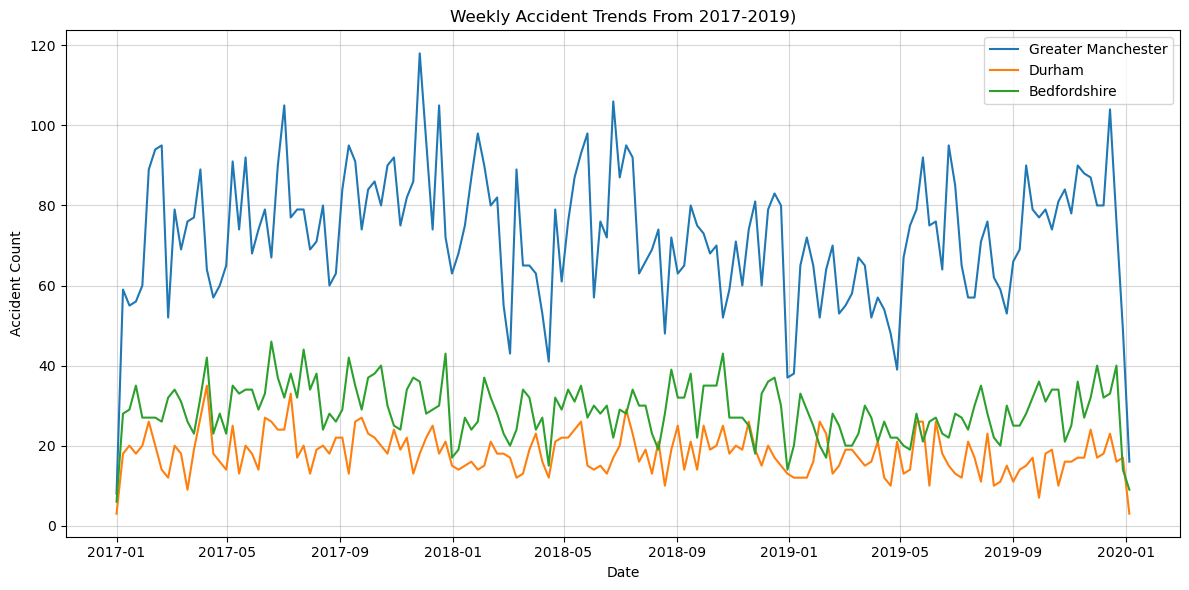

In [145]:
# Weekly accidents over time visualization
plt.figure(figsize=(12, 6))
for force in police_df['police_force'].unique():
    force_info = police_df[police_df['police_force'] == force]['accident_count'].resample('W').sum()
    plt.plot(force_info, label=force)

plt.title('Weekly Accident Trends From 2017-2019)')
plt.xlabel('Date')
plt.ylabel('Accident Count')
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

## STL Decomposotion for the cities

ADF Statistic for Greater Manchester: -7.864491507644725; p-value: 5.17824964642519e-12


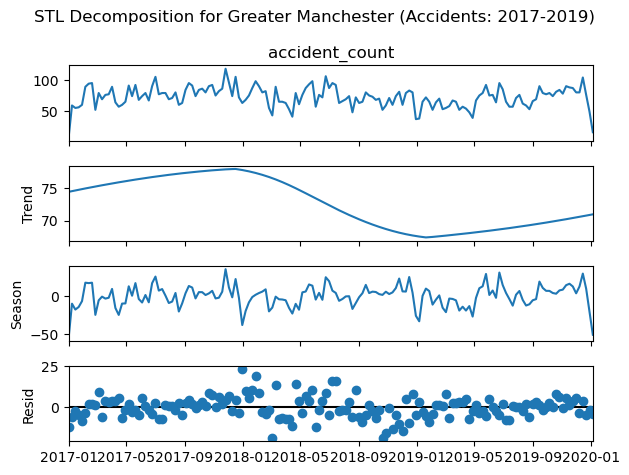

ADF Statistic for Durham: -10.347689947470238; p-value: 2.5851552819695606e-18


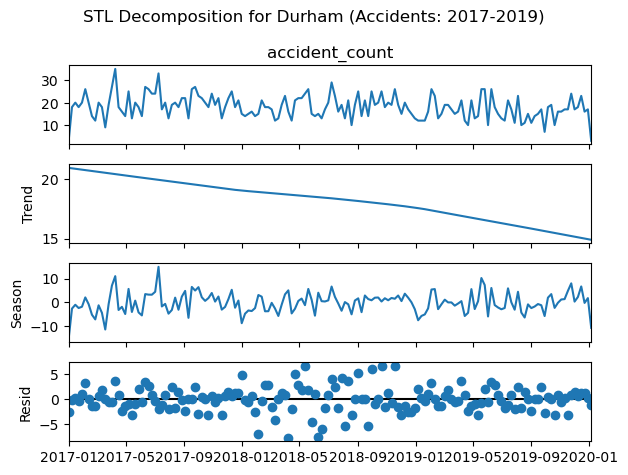

ADF Statistic for Bedfordshire: -8.943977295374932; p-value: 9.093168367203076e-15


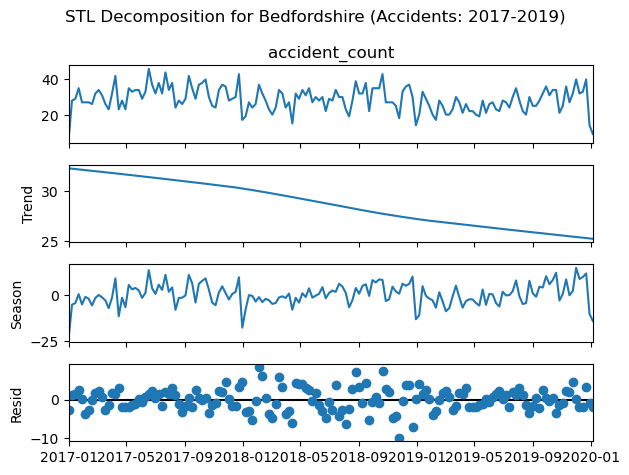

In [148]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller

# Loop through each police force (city) and apply STL decomposition
for force in police_df['police_force'].unique():
    
    # Filter data for the current police force (city)
    city_data = police_df[police_df['police_force'] == force]
    
    # Making sure the time series is continuous (fill missing weeks)
    city_data = city_data.resample('W').sum()  # Resample by week and sum accidents in case there are missing weeks
    
    # fill missing values with zero
    city_data['accident_count'].fillna(0, inplace=True)  # Fill missing values with 0

    
    # Decompose the time series using STL (period = 52 for weekly data, assuming yearly seasonality)
    stl = STL(city_data['accident_count'], period=52)
    result = stl.fit()
    
    # Plot the decomposition components (seasonal, trend, residual)
    result.plot()
    
    # Title for the plot to indicate the current city
    plt.suptitle(f"STL Decomposition for {force} (Accidents: 2017-2019)", fontsize=12)
    plt.tight_layout()

    # Stationarity test using Augmented Dickey-Fuller (ADF) test
    ADF_test = adfuller(city_data['accident_count'])[:2]
    print(f"ADF Statistic for {force}: {ADF_test[0]}; p-value: {ADF_test[1]}")
    
    # Show the plot
    plt.show()


- ADF Statistic for Greater Manchester: -7.864491507644721; p-value: 5.1782496464252286e-12
- ADF Statistic for Durham: -10.347689947470235; p-value: 2.5851552819696157e-18
- ADF Statistic for Bedfordshire: -8.943977295374934; p-value: 9.093168367202879e-15

- The p-value of all the three(3) cities are less than 0.05, so they are stationary

## Plotting the ACF and PACF

<Figure size 1200x600 with 0 Axes>

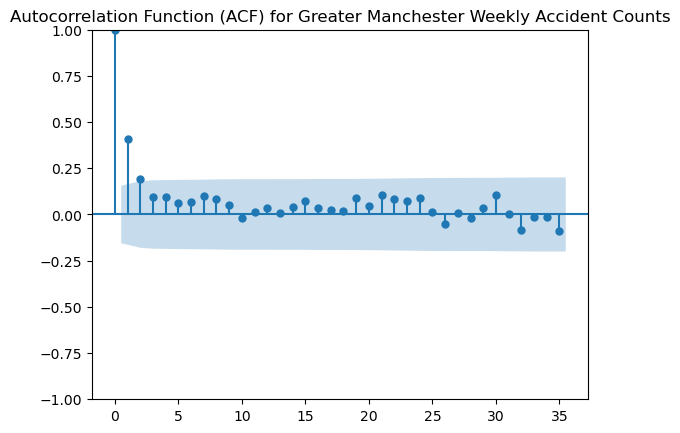

<Figure size 1200x600 with 0 Axes>

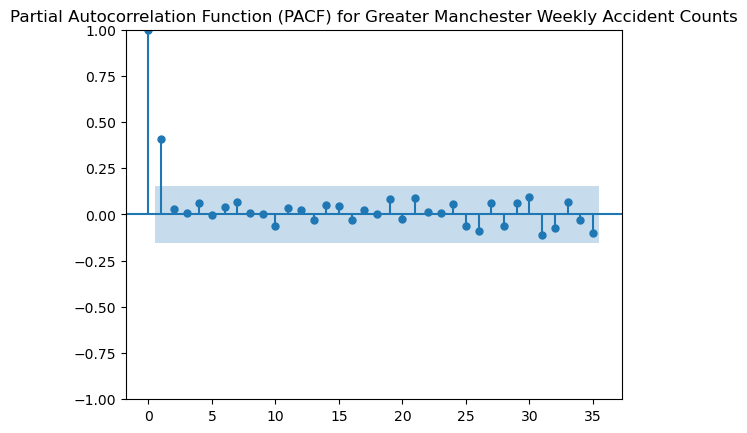

<Figure size 1200x600 with 0 Axes>

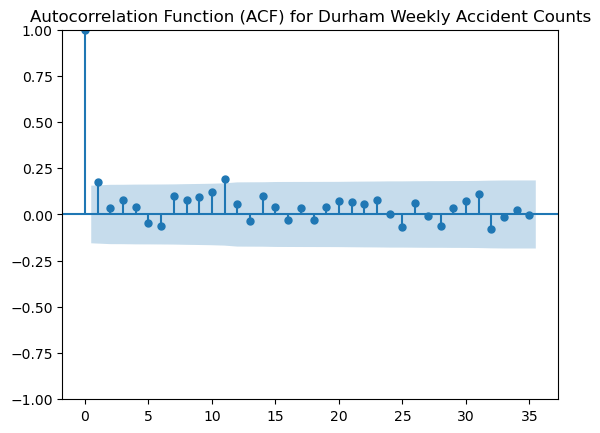

<Figure size 1200x600 with 0 Axes>

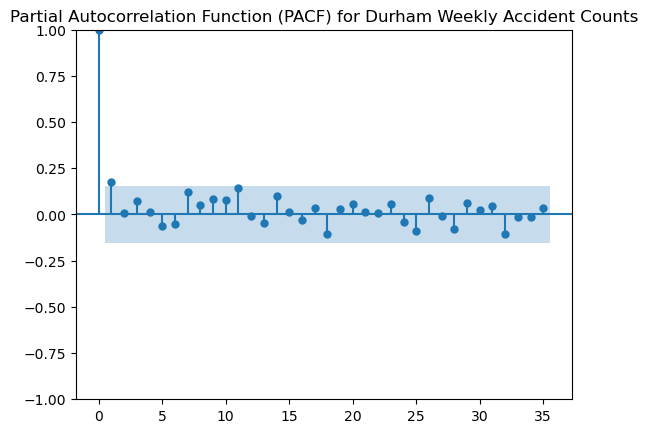

<Figure size 1200x600 with 0 Axes>

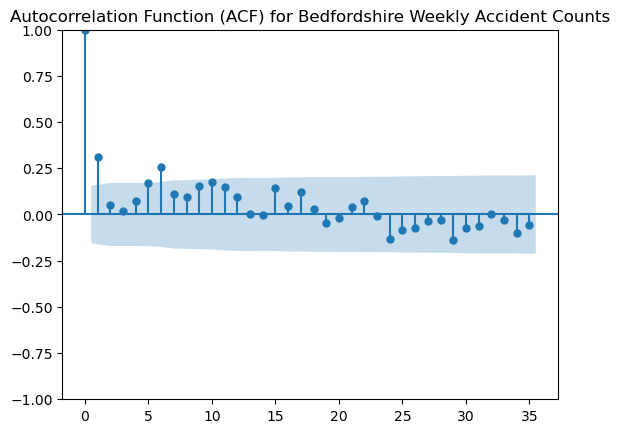

<Figure size 1200x600 with 0 Axes>

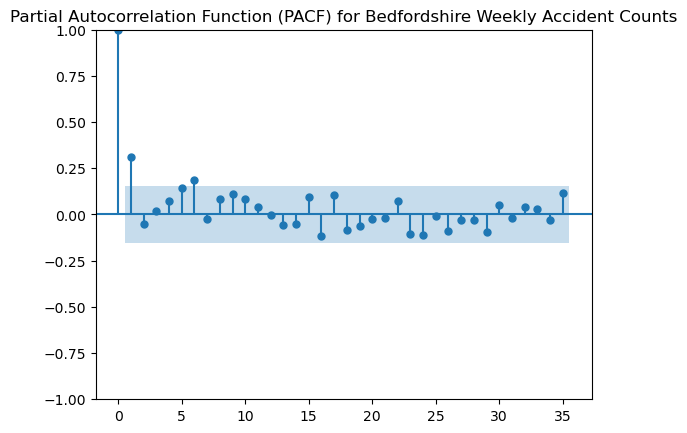

In [153]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Loop through each police force (city) and apply ACF and PACF analysis
for force in police_df['police_force'].unique():
    # Filter data for the current police force (city)
    city_data = police_df[police_df['police_force'] == force]
    
    # Resample the data weekly, sum the accident counts, and fill missing values if any
    city_data = city_data.resample('W').sum()
    
    
    # Plot ACF for the current city
    plt.figure(figsize=(12, 6))
    plot_acf(city_data['accident_count'], lags=35)
    plt.title(f'Autocorrelation Function (ACF) for {force} Weekly Accident Counts')
    plt.show()

    # Plot PACF for the current city
    plt.figure(figsize=(12, 6))
    plot_pacf(city_data['accident_count'], lags=35)
    plt.title(f'Partial Autocorrelation Function (PACF) for {force} Weekly Accident Counts')
    plt.show()


## Building and Evaluating the models (ARIMA,SARIMA AND XGBOOST)

In [155]:
# Resampling data to weekly frequency for each police force
weekly_info = {}
for force in police_df['police_force'].unique():
    weekly_info[force] = police_df[police_df['police_force'] == force]['accident_count'].resample('W').sum()

In [158]:
#!pip install xgboost

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.16605D+00    |proj g|=  2.85545D-02

At iterate    5    f=  2.16378D+00    |proj g|=  2.41570D-04

At iterate   10    f=  2.16377D+00    |proj g|=  1.73117D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     14      1     0     0   1.663D-06   2.164D+00
  F =   2.1637667834941858     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

Error Metrics for Greater Manchester:
-------------------------------

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.27552D+00    |proj g|=  8.02764D-01

At iterate    5    f=  1.77365D+00    |proj g|=  1.42472D-02

At iterate   10    f=  1.76152D+00    |proj g|=  8.26554D-04

At iterate   15    f=  1.76100D+00    |proj g|=  3.61803D-03

At iterate   20    f=  1.76059D+00    |proj g|=  6.92844D-04

At iterate   25    f=  1.76055D+00    |proj g|=  2.46662D-04

At iterate   30    f=  1.76054D+00    |proj g|=  1.18155D-04

At iterate   35    f=  1.76054D+00    |proj g|=  6.03099D-05

At iterate   40    f=  1.76054D+00    |proj g|=  9.50656D-05

At iterate   45    f=  1.76054D+00    |proj g|=  4.44645D-05

At iterate   50    f=  1.76054D+00    |proj g|=  9.95698D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Error Metrics for Bedfordshire:
--------------------------------------------------
         ARIMA    SARIMA   XGBoost
RMSE  7.140525  6.216824  7.066652
MAE   5.811948  5.020562  5.751010


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.69061D+00    |proj g|=  4.80911D-02

At iterate    5    f=  1.65591D+00    |proj g|=  4.51627D-03

At iterate   10    f=  1.65289D+00    |proj g|=  3.28535D-03

At iterate   15    f=  1.65254D+00    |proj g|=  3.80537D-04

At iterate   20    f=  1.65251D+00    |proj g|=  2.56726D-04

At iterate   25    f=  1.65251D+00    |proj g|=  4.15121D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     31      1     0     0   

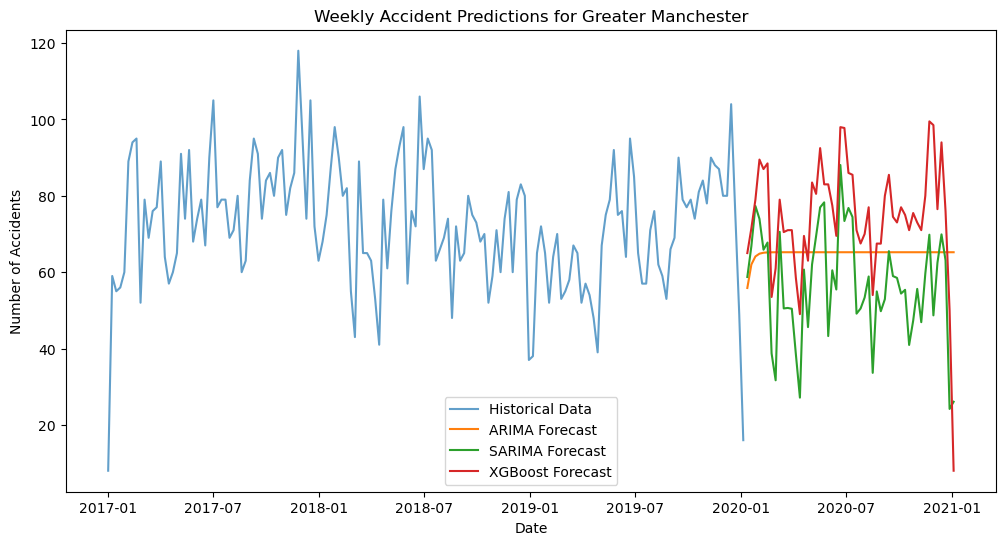


Weekly Accident Predictions Summary for Greater Manchester:
Average predicted weekly accidents:
ARIMA: 64.95
SARIMA: 56.62
XGBoost: 74.53
                ARIMA     SARIMA    XGBoost
Date                                       
2020-01-12  55.861246  58.741616  65.000076
2020-01-19  62.004370  66.789601  71.498734
2020-01-26  64.117210  77.328476  78.998726
2020-02-02  64.843892  73.966296  89.492653
2020-02-09  65.093824  65.888185  87.006516


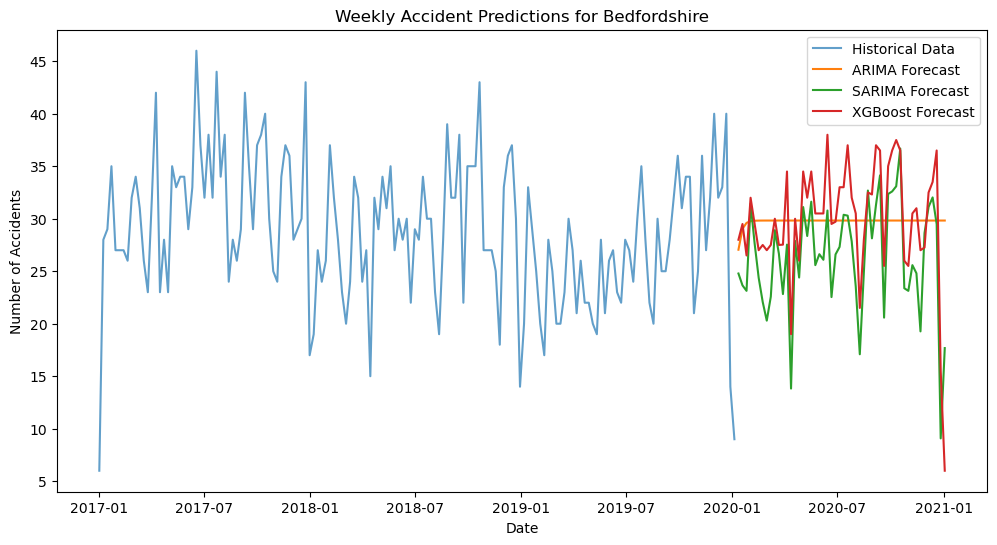


Weekly Accident Predictions Summary for Bedfordshire:
Average predicted weekly accidents:
ARIMA: 29.75
SARIMA: 26.31
XGBoost: 29.89
                ARIMA     SARIMA    XGBoost
Date                                       
2020-01-12  27.047037  24.781701  27.999931
2020-01-19  29.040523  23.652150  29.498425
2020-01-26  29.604447  23.131256  26.501095
2020-02-02  29.763971  31.422545  31.997250
2020-02-09  29.809098  27.642816  29.499241


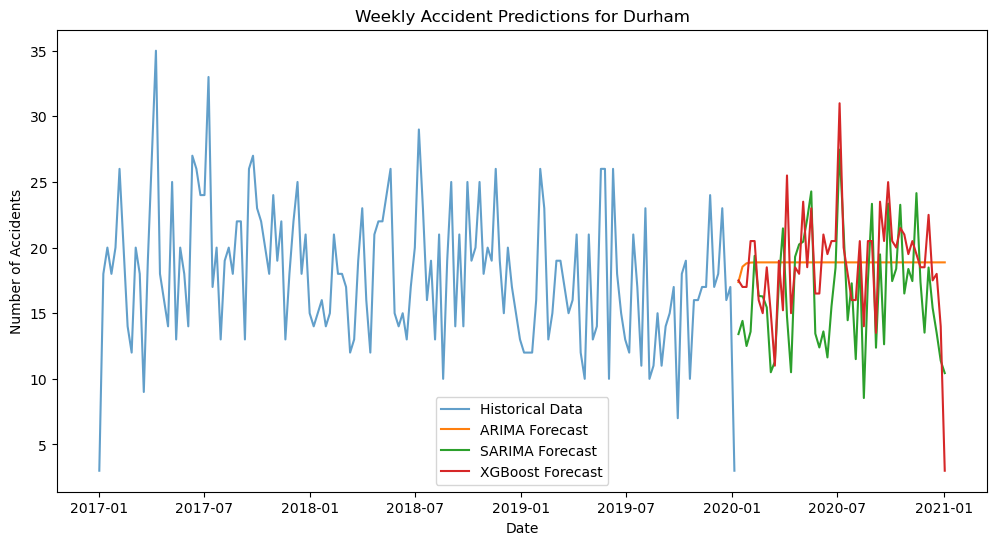


Weekly Accident Predictions Summary for Durham:
Average predicted weekly accidents:
ARIMA: 18.84
SARIMA: 16.60
XGBoost: 18.70
                ARIMA     SARIMA    XGBoost
Date                                       
2020-01-12  17.375088  13.410371  17.497679
2020-01-19  18.547211  14.416550  17.001215
2020-01-26  18.802810  12.500487  17.001215
2020-02-02  18.858548  13.594755  20.498531
2020-02-09  18.870702  19.372444  20.498531


In [160]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to calculate error metrics
def calculate_metrics(actual, forecast, model_name):
    rmse = mean_squared_error(actual, forecast, squared=False)
    mae = mean_absolute_error(actual, forecast)
    return [rmse, mae]

results = {}
train_test_data = {}

# Assuming city_data is a dictionary with city-specific data
for force_id, force_name in police_map.items():
    series = weekly_info[force_name]  # This will hold the accident count series for each city
    
    # Define train-test split for the city
    train_size = len(series) - 52  # 52 weeks for test (one year of data)
    train, test = series[:train_size], series[train_size:]
    
    # Store train and test data for future use
    train_test_data[force_name] = {'train': train, 'test': test}
    
    # ARIMA Model
    arima_model = ARIMA(train, order=(1, 1, 1))
    arima_fit = arima_model.fit()
    arima_forecast = arima_fit.forecast(steps=len(test))
 
    # SARIMA Model
    sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
    sarima_fit = sarima_model.fit()
    sarima_forecast = sarima_fit.forecast(steps=len(test))
 
    # XGBoost Model
    xgb_data = pd.DataFrame(series)
    xgb_data['week'] = xgb_data.index.isocalendar().week
    xgb_data['month'] = xgb_data.index.month
    
    X = xgb_data[['month', 'week']]
    y = xgb_data['accident_count']
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
 
    xgb_model = XGBRegressor(objective='reg:squarederror', random_state=20)
    xgb_model.fit(X_train, y_train)
    xgb_forecast = xgb_model.predict(X_test)

    # Calculating and displaying error metrics
    metrics_arima = calculate_metrics(test, arima_forecast, "ARIMA")
    metrics_sarima = calculate_metrics(test, sarima_forecast, "SARIMA")
    metrics_xgb = calculate_metrics(y_test, xgb_forecast, "XGBoost")

    metrics_summary = pd.DataFrame({
        'ARIMA': metrics_arima,
        'SARIMA': metrics_sarima,
        'XGBoost': metrics_xgb
    }, index=['RMSE', 'MAE'])
    
    # Print the error metrics summary
    print(f"\nError Metrics for {force_name}:")
    print("-" * 50)
    print(metrics_summary)
    
    # Store results for future use
    # After metrics_summary is printed

    results[force_name] = {
        'ARIMA': arima_fit.forecast(steps=52),
        'SARIMA': sarima_fit.forecast(steps=52),
        'XGBoost_model': xgb_model,
        'test': test,
        'weekly_info': series,
        'rmse_arima': metrics_arima[0],
        'rmse_sarima': metrics_sarima[0],
        'rmse_xgb': metrics_xgb[0]
    }


upcoming_years = 52  # Based on the number of weeks per year

# Generate predictions for each model
for force_name in results.keys():
    test = results[force_name]['test']
    
    # Generate forecasts for ARIMA and SARIMA
    forecast_arima = results[force_name]['ARIMA']
    forecast_sarima = results[force_name]['SARIMA']
    
    # Generate future features for XGBoost
    upcoming_dates = pd.date_range(start=test.index[-1], periods=upcoming_years + 1, freq='W')[1:]
    future_variables = pd.DataFrame({
        'month': upcoming_dates.month,
        'week': upcoming_dates.isocalendar().week
    })
    
    # Predict with XGBoost
    xgb_model = results[force_name]['XGBoost_model']
    forecast_xgb = xgb_model.predict(future_variables)
    
    # Create a DataFrame for forecasts
    forecasts_df = pd.DataFrame({
        'Date': upcoming_dates,
        'ARIMA': forecast_arima[:len(upcoming_dates)],
        'SARIMA': forecast_sarima[:len(upcoming_dates)],
        'XGBoost': forecast_xgb[:len(upcoming_dates)]
    }).set_index('Date')
    
    # Visualize the predictions
    plt.figure(figsize=(12, 6))
    plt.plot(results[force_name]['weekly_info'].index, results[force_name]['weekly_info'], label='Historical Data', alpha=0.7)
    plt.plot(forecasts_df.index, forecasts_df['ARIMA'], label='ARIMA Forecast')
    plt.plot(forecasts_df.index, forecasts_df['SARIMA'], label='SARIMA Forecast')
    plt.plot(forecasts_df.index, forecasts_df['XGBoost'], label='XGBoost Forecast')
    plt.title(f'Weekly Accident Predictions for {force_name}')
    plt.xlabel('Date')
    plt.ylabel('Number of Accidents')
    plt.legend()
    plt.show()
    
    # Display numerical predictions
    print(f"\nWeekly Accident Predictions Summary for {force_name}:")
    print(f"Average predicted weekly accidents:")
    print(f"ARIMA: {forecast_arima.mean():.2f}")
    print(f"SARIMA: {forecast_sarima.mean():.2f}")
    print(f"XGBoost: {forecast_xgb.mean():.2f}")
    
    # Display the first few rows of the forecast DataFrame
    print(forecasts_df.head())

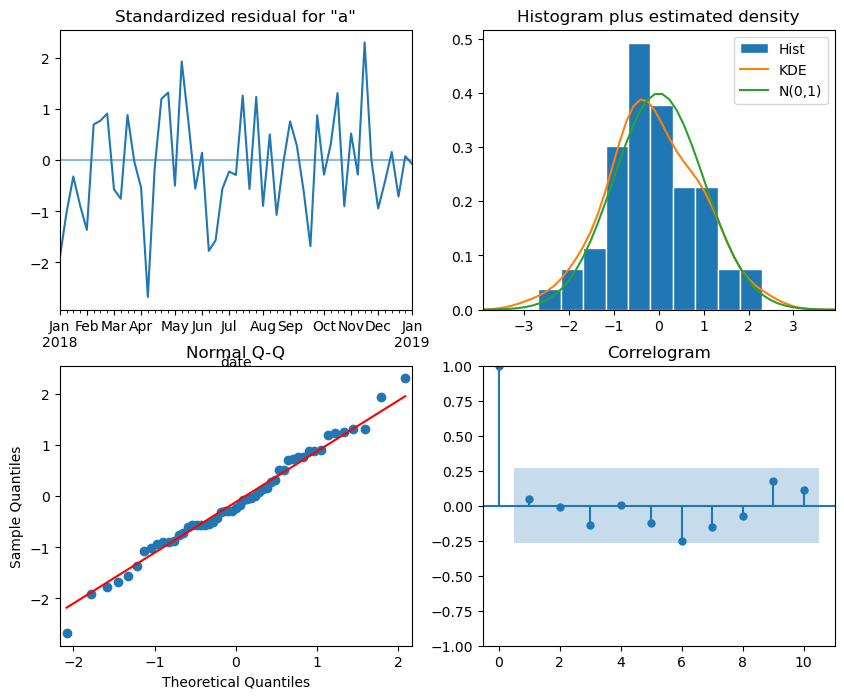

In [161]:
# Plots of the Q-Q plot
sarima_fit.plot_diagnostics(figsize=(10,8));

In [164]:
# Evaluation using Ljung-Box test

from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(sarima_fit.resid) #returns test score for first 10 lags.

lb_stat  lb_pvalue
1    1.096468   0.295043
2    1.210222   0.546014
3    2.655496   0.447843
4    4.579431   0.333233
5    6.207974   0.286505
6    8.663121   0.193429
7   11.374959   0.123079
8   11.379678   0.181100
9   13.086963   0.158711
10  13.180749   0.213741

## Comparing all the models to a baseline predictive model - NAIVE

In [167]:
# Function to create naive predictions
def naive_forecast(train, test_size):
    """
    Generate naive predictions based on the last observed value from the training set.
    
    Parameters:
    - train: The training data (time series)
    - test_size: The number of periods to forecast (length of the test set)
    
    Returns:
    - naive_preds: The naive predictions for the test period
    """
    # Get the last observed value from the training data
    last_observed_value = train.iloc[-1]  # Last value of the train set
    
    # Create a naive prediction for the test period (same value for each prediction)
    naive_preds = [last_observed_value] * test_size
    
    return naive_preds

# Assuming the same structure as your original code:
naive_results = {}

# Iterate through the cities (police forces)
for force_id, force_name in police_map.items():
    series = weekly_info[force_name]  # This will hold the accident count series for each city
    
    # Define train-test split for the city
    train_size = len(series) - 52  # 52 weeks for test (one year of data)
    train, test = series[:train_size], series[train_size:]
    
    # Store train and test data for future use
    train_test_data[force_name] = {'train': train, 'test': test}
    
    # Generate naive predictions
    naive_preds = naive_forecast(train, len(test))
    
    # Store results for future use
    naive_results[force_name] = {
        'naive_preds': naive_preds,
        'test': test,
        'weekly_info': series
    }
    
    # Calculate error metrics for the naive forecast
    metrics_naive = calculate_metrics(test, naive_preds, "Naive")
    
    metrics_summary_naive = pd.DataFrame({
        'Naive': metrics_naive
    }, index=['RMSE', 'MAE'])

    naive_rmse = calculate_metrics(test, naive_preds, "Naive")[0]
    naive_results[force_name]['rmse_naive'] = naive_rmse

    
    # Print the error metrics summary for the naive model
    print(f"\nError Metrics for {force_name} - Naive Forecast:")
    print("-" * 50)
    print(metrics_summary_naive)


Error Metrics for Greater Manchester - Naive Forecast:
--------------------------------------------------
          Naive
RMSE  34.701751
MAE   31.903846

Error Metrics for Bedfordshire - Naive Forecast:
--------------------------------------------------
         Naive
RMSE  8.916277
MAE   7.192308

Error Metrics for Durham - Naive Forecast:
--------------------------------------------------
         Naive
RMSE  6.541289
MAE   5.173077


## Visualizations


 RMSE DataFrame:
                        Naive      ARIMA     SARIMA    XGBoost
City                                                          
Greater Manchester  34.701751  16.024399  19.499225  13.796485
Bedfordshire         8.916277   7.140525   6.216824   7.066652
Durham               6.541289   5.630271   6.812313   6.531975


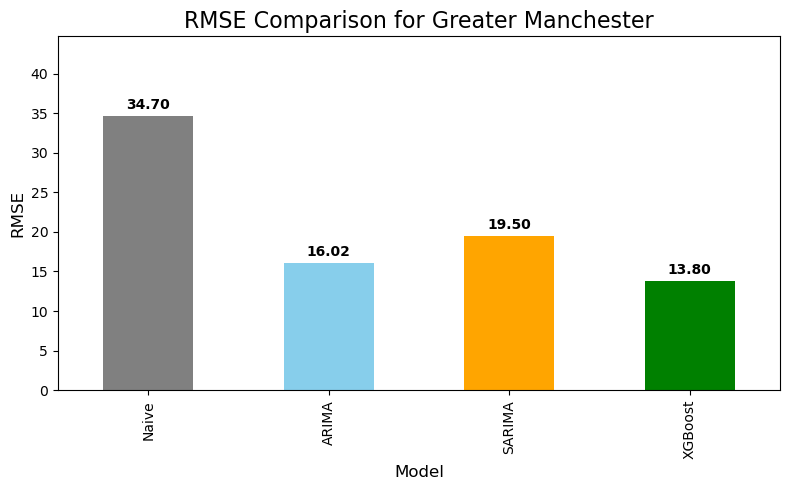

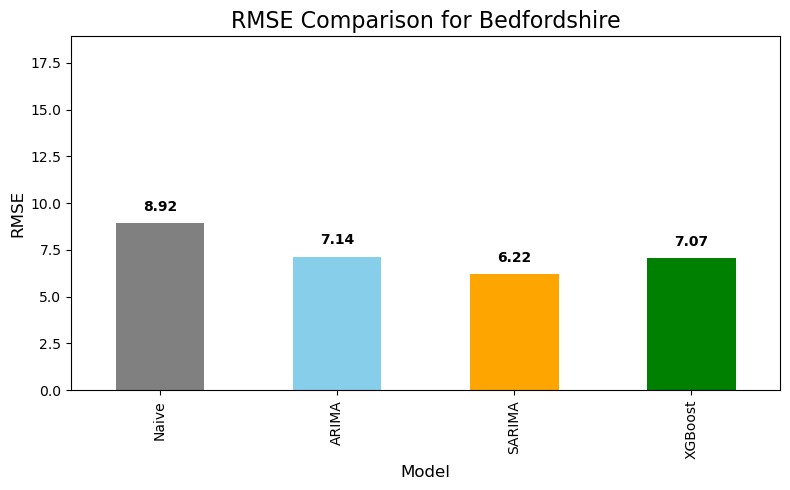

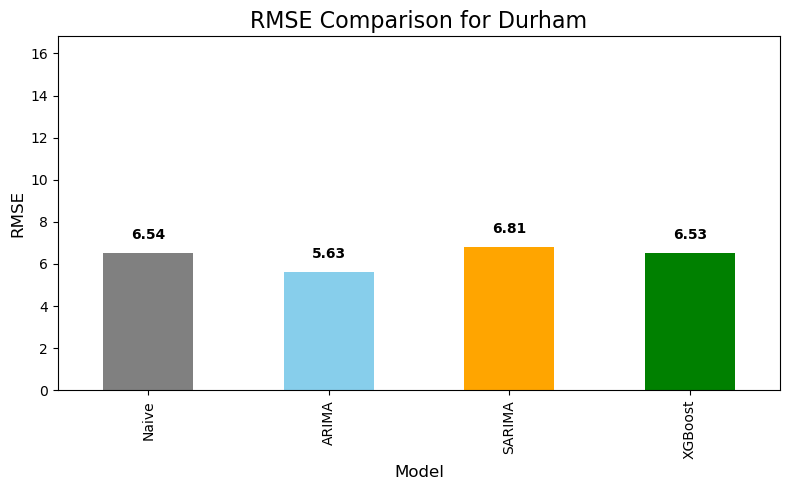

In [170]:
# Initialize a list to store RMSE results
rmse_results = []

# Calculate RMSE for each city and model
for force_name in results.keys():
    test = results[force_name]['test']
    
    # Fetch model RMSEs
    rmse_arima = results[force_name]["rmse_arima"]
    rmse_sarima = results[force_name]["rmse_sarima"]
    rmse_xgb = results[force_name]["rmse_xgb"]
    
    # Calculate RMSE for naive model
    rmse_naive = calculate_metrics(
        naive_results[force_name]['test'],
        naive_results[force_name]['naive_preds'],
        model_name="Naive"
    )[0]  # RMSE is the first value

    # Store all RMSEs for this city
    rmse_results.append({
        'City': force_name,
        'Naive': rmse_naive,
        'ARIMA': rmse_arima,
        'SARIMA': rmse_sarima,
        'XGBoost': rmse_xgb
    })

# Convert to DataFrame
rmse_df = pd.DataFrame(rmse_results)
rmse_df.set_index('City', inplace=True)

print("\n RMSE DataFrame:")
print(rmse_df)

# Plot individual bar charts per city
for city in rmse_df.index:
    plt.figure(figsize=(8, 5))
    rmse_df.loc[city].plot(kind='bar', color=['gray', 'skyblue', 'orange', 'green'])
    plt.title(f'RMSE Comparison for {city}', fontsize=16)
    plt.ylabel('RMSE', fontsize=12)
    plt.xlabel('Model', fontsize=12)
    
    # Add values on top of bars
    for i, value in enumerate(rmse_df.loc[city]):
        plt.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontweight='bold')
    
    plt.ylim(0, rmse_df.loc[city].max() + 10)
    plt.tight_layout()
    plt.show()

## Question 7: Identify the three Local Super Output Areas (LSOAs) of Hull city that recorded the highest number of road accidents in the first three months of 2020, then employ a time series model to forecast daily accident occurrences for the upcoming month (e.g., July), leveraging data from the preceding six months (e.g., January to June) for these high-incident areas.

In [173]:
#writing the sql query to fetch info

query = """
SELECT 
    l.lsoa01nm as lsoa_name,  
    l.lsoa01cd as lsoa_code,  
    COUNT(*) as accident_count
FROM accident a
JOIN lsoa l ON a.lsoa_of_accident_location = l.lsoa01cd
WHERE l.lsoa01nm LIKE 'Kingston upon Hull%'
    AND substr(a.date, -4) = '2020'  -- For year 2020
    AND substr(a.date, 4, 2) IN ('01', '02', '03')  -- January to March(first 3 months)
GROUP BY l.lsoa01cd, l.lsoa01nm
ORDER BY accident_count DESC
LIMIT 3;
"""

#executing query and displaying of results
cur.execute(query)  
highest_lsoas = cur.fetchall()  

print("Top 3 LSOAs with Highest Accident Count in Hull (January-March 2020)")
print(f"{'LSOA Name':<30} {'LSOA Code':<15} {'Accident Count':>15}")

accident_count = 0  # Initialize total accidents counter
for lsoa_name, lsoa_code, count in highest_lsoas:
    print(f"{lsoa_name:<30} {lsoa_code:<15} {count:>15}")

Top 3 LSOAs with Highest Accident Count in Hull (January-March 2020)
LSOA Name                      LSOA Code        Accident Count
Kingston upon Hull 016D        E01012817                    10
Kingston upon Hull 020B        E01012848                     7
Kingston upon Hull 030B        E01012889                     7



Analyzing LSOA: Kingston upon Hull 016D
Total accidents in first three months of 2020: 10


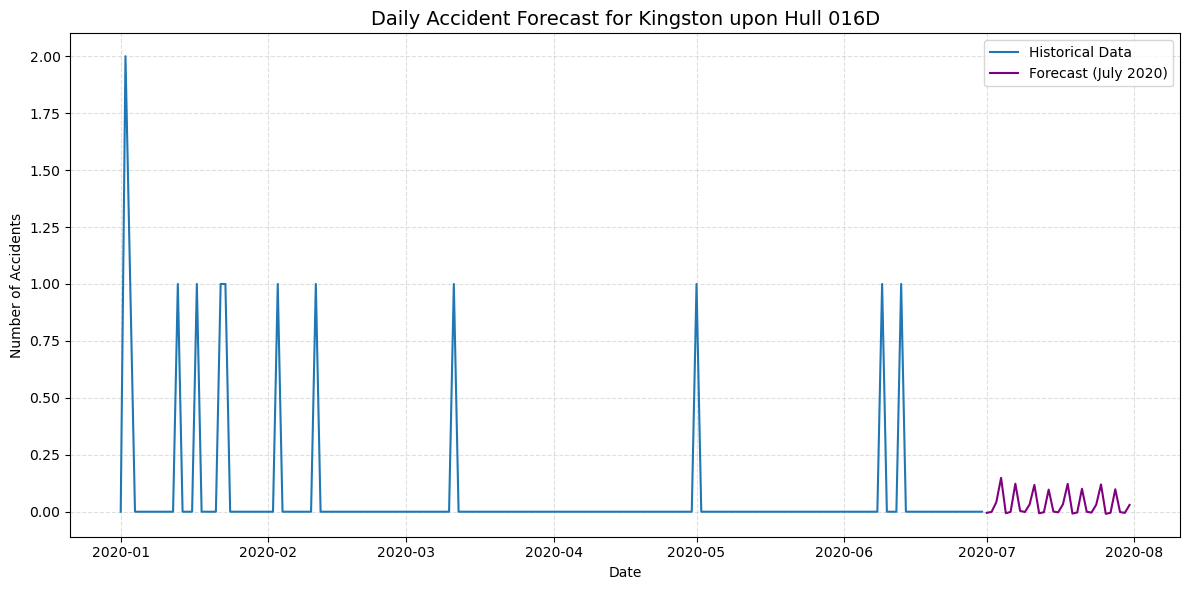


Analyzing LSOA: Kingston upon Hull 020B
Total accidents in first three months of 2020: 7


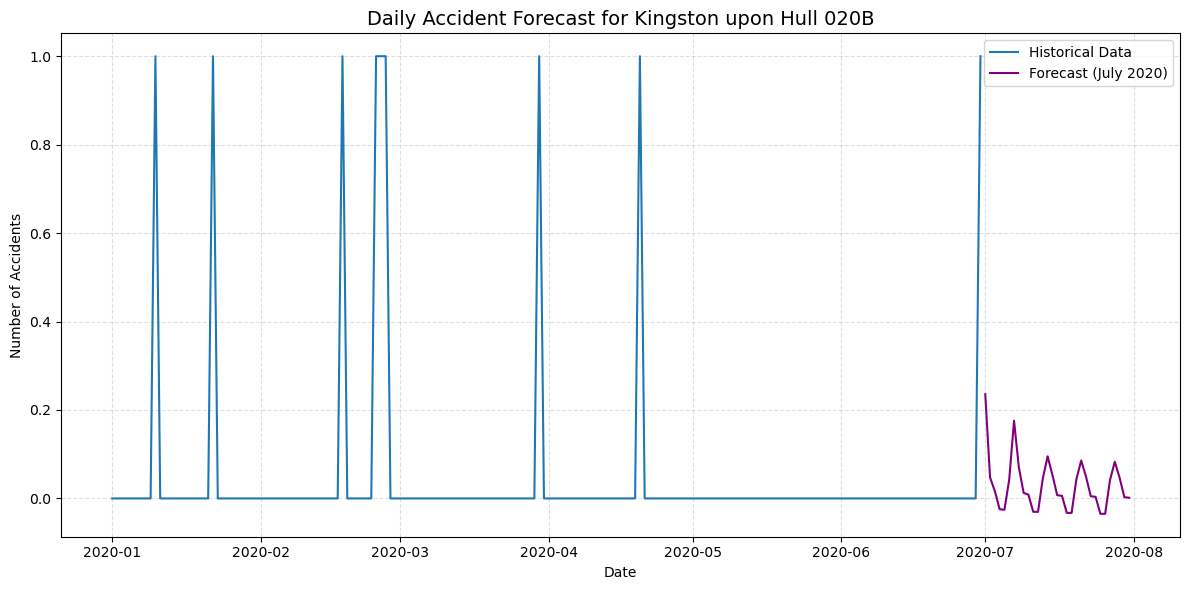


Analyzing LSOA: Kingston upon Hull 030B
Total accidents in first three months of 2020: 7


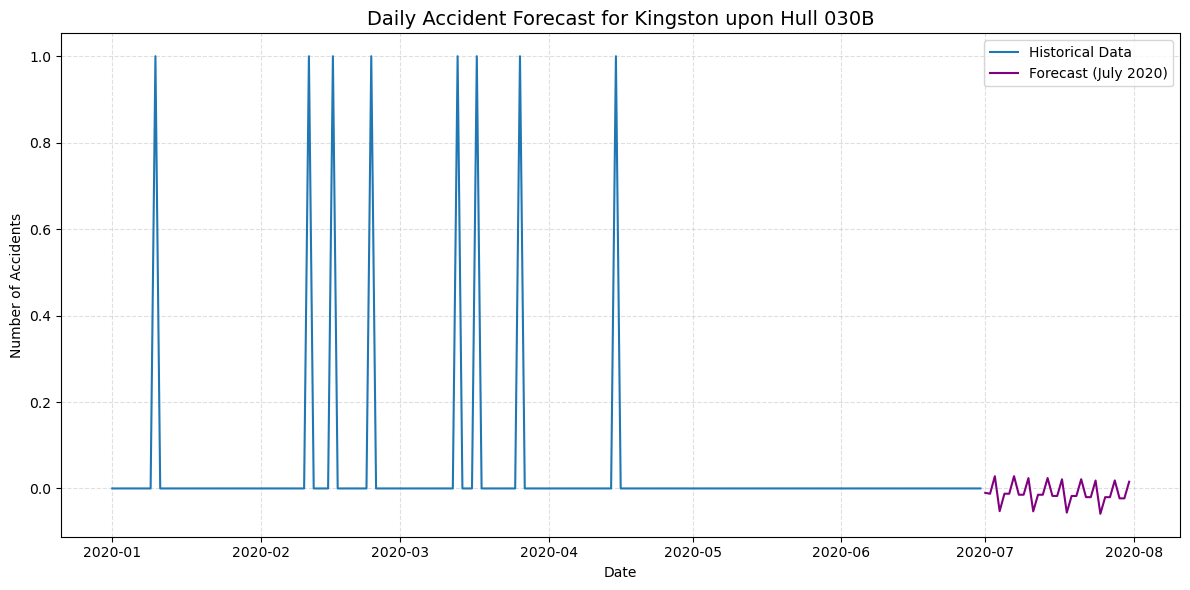

In [179]:
# Function to retrieve accident data for Jan–June 2020

def retrieve_past_data(lsoa_code):
    hist_query = """
    SELECT 
        date,
        COUNT(*) as daily_accidents
    FROM accident
    WHERE lsoa_of_accident_location = ?
    AND substr(date, -4) = '2020'  -- For year 2020
    AND substr(date, 4, 2) IN ('01', '02', '03', '04', '05', '06')  -- Jan-June(first 6 months)
    GROUP BY date
    ORDER BY 
        substr(date, -4),  -- Year
        substr(date, 4, 2),  -- Month
        substr(date, 1, 2)   -- Day
    """
    return pd.read_sql_query(hist_query, conn, params=[lsoa_code])


# Function to train SARIMA model and forecast July 2020
def accidents_predictions(data, lsoa_name):
   
    # Convert date column to datetime
    data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')
    data.set_index('date', inplace=True) #sets date column as the index

    # Create a continuous date index and fill missing dates with zero accidents
    idx = pd.date_range(start='2020-01-01', end='2020-06-30')
    data_rx = data.reindex(idx, fill_value=0)
    data_rx.index.name = 'date'

    # Fit SARIMA model with weekly seasonality
    model = SARIMAX(data_rx['daily_accidents'],
                    order=(1, 1, 1),
                    seasonal_order=(1, 1, 1, 7))
    results = model.fit(disp=False)

    # Forecast next 31 days (July 2020)
    forecast = results.forecast(steps=31)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(data_rx.index, data_rx['daily_accidents'], label='Historical Data')
    plt.plot(forecast.index, forecast, label='Forecast (July 2020)', color='purple')
    plt.title(f'Daily Accident Forecast for {lsoa_name}', fontsize=14)
    plt.xlabel('Date') #x-axis label
    plt.ylabel('Number of Accidents') #y-axis label
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

    return forecast


# Execute forecasting for top 3 accident LSOAs

cur.execute(query)
highest_lsoas = cur.fetchall()

for lsoa_name, lsoa_code, count in highest_lsoas:
    print(f"\nAnalyzing LSOA: {lsoa_name}")
    print(f"Total accidents in first three months of 2020: {count}")

    # Retrieve and forecast
    data_hist = retrieve_past_data(lsoa_code) # Getting LSOA historical data
    forecast = accidents_predictions(data_hist, lsoa_name)


In [181]:
# Function to convert raw accident data into time series
def prepare_timeseries(df):
    """
    Converts the accident data into a continuous daily time series
    from January 1 to June 30, 2020. Missing dates are filled with 0.
    """
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')  # Convert string dates to datetime
    df.set_index('date', inplace=True)  # Set the datetime column as the index
    
    date_range = pd.date_range(start='2020-01-01', end='2020-06-30')  # Define the full range of expected dates
    ts_data = df.reindex(date_range, fill_value=0)  # Fill missing days with 0 accidents
    ts_data.index.name = 'date'  # Set index name for clarity
    
    return ts_data

# Function to train SARIMA model on accident time series
def train_sarima_model(ts_series):
    """
    Fits a SARIMA model to the accident data with weekly seasonality.
    Returns the trained model results.
    """
    model = SARIMAX(ts_series,
                    order=(1, 1, 1),            # ARIMA parameters: (p, d, q)
                    seasonal_order=(1, 1, 1, 7))  # Seasonal parameters: (P, D, Q, S) with 7-day cycle
    results = model.fit(disp=False)  # Fit the model silently
    return results


# Function to evaluate model performance on June data
def evaluate_model(results, actual):
    """
    Calculates AIC, RMSE for model predictions against June 2020 actual data.
    """
    predictions = results.get_prediction(start=actual.index[0], end=actual.index[-1]).predicted_mean  # Predict June values

    # Calculate RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(actual, predictions))

    return results.aic, rmse


#  Analyze each top LSOA area
for lsoa_name, lsoa_code, count in highest_lsoas:
    print(f"\nAnalyzing LSOA: {lsoa_name}")  # Display LSOA being analyzed
    print(f"Total accidents in the first 3 months of 2020: {count}")  # Show accident count for reference

    # Retrieve and prepare historical accident data
    raw_data = retrieve_past_data(lsoa_code)
    ts_data = prepare_timeseries(raw_data)

    # Train the SARIMA model on Jan–June data
    results = train_sarima_model(ts_data['daily_accidents'])

    # Extract June data to evaluate model performance
    june_actual = ts_data[ts_data.index.month == 6]['daily_accidents']
    aic, rmse = evaluate_model(results, june_actual)

    # Display evaluation results
    print("\nModel Evaluation Metrics:")

    print(f"AIC : {aic:.2f}")       # Akaike Information Criterion (lower is better)
    print(f"RMSE: {rmse:.2f}")      # Error magnitude


Analyzing LSOA: Kingston upon Hull 016D
Total accidents in the first 3 months of 2020: 10

Model Evaluation Metrics:
AIC : 77.86
RMSE: 0.27

Analyzing LSOA: Kingston upon Hull 020B
Total accidents in the first 3 months of 2020: 7

Model Evaluation Metrics:
AIC : -3.18
RMSE: 0.18

Analyzing LSOA: Kingston upon Hull 030B
Total accidents in the first 3 months of 2020: 7

Model Evaluation Metrics:
AIC : -14.13
RMSE: 0.03


## Question 8 : Construct a social network using the provided data and visualise the network, then provide the basic network characteristics, including numbers of nodes and edges, network density, average degree.

In [184]:
#!pip install networkx

In [186]:
import networkx as nx

In [187]:
#providing the file
file_name = "facebook_combined.txt"

# Load the graph from edge list
G = nx.read_edgelist(file_name, nodetype=int)

# Compute basic stats
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)
avg_deg = sum(dict(G.degree()).values()) / num_nodes

# Display results
print("\n--- Social Network Summary ---")
print(f"Nodes: {num_nodes}")
print(f"Edges: {num_edges}")
print(f"Density: {density:.4f}")
print(f"Average Degree: {avg_deg:.2f}")


--- Social Network Summary ---
Nodes: 4039
Edges: 88234
Density: 0.0108
Average Degree: 43.69


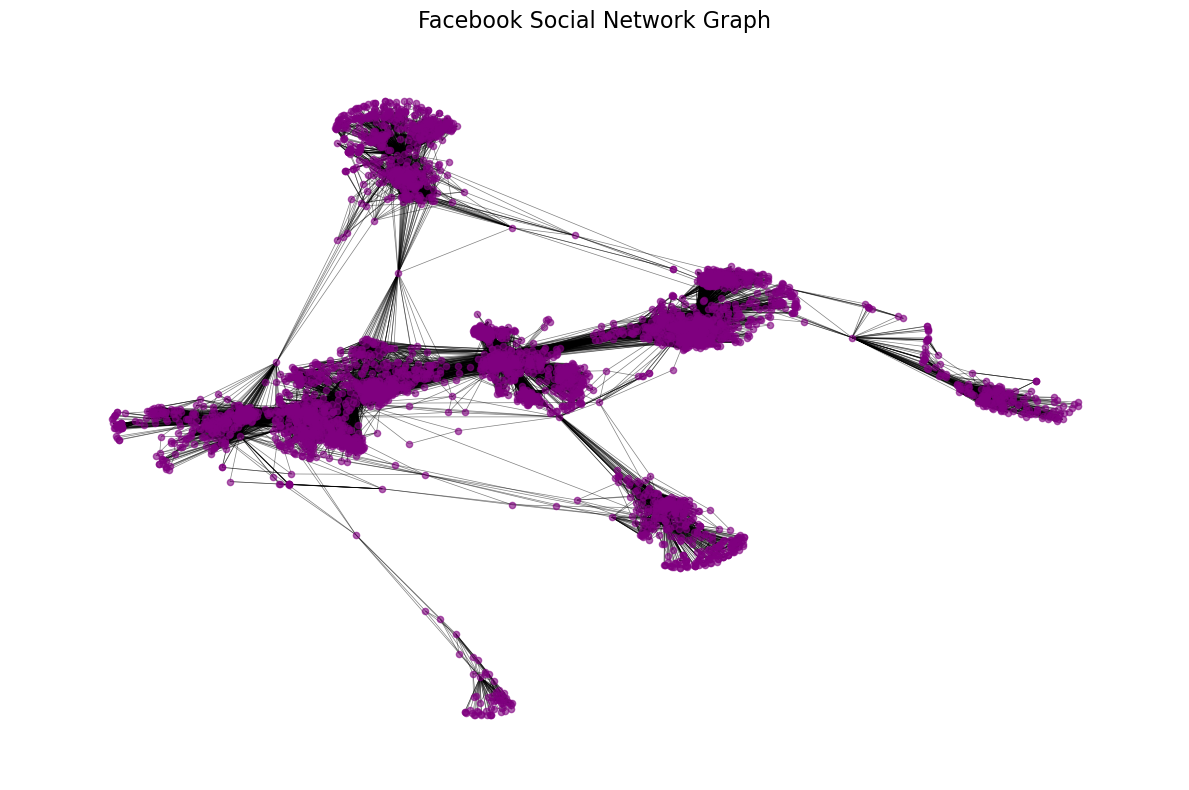

In [190]:
# Plotting the social network
plt.figure(figsize=(12, 8))

# Compute spring layout (force-directed)
pos = nx.spring_layout(G)  # fixed seed for consistent layout

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=20, node_color='purple', alpha=0.6)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)

# Add title and remove axes
plt.title("Facebook Social Network Graph", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

## Question 9 : Calculate the edge centrality of this network and plot the distribution of the edge centrality values.

In [192]:
# calculating edge betweenness centrality
edge_centrality = nx.edge_betweenness_centrality(G)

# Printing the insights 
print("\n--- Edge Betweenness Centrality ---")
print(f"Edges analyzed       : {len(edge_centrality)}")
print(f"Max centrality       : {max(edge_centrality.values()):.4f}")
print(f"Min centrality       : {min(edge_centrality.values()):.4f}")
print(f"Average centrality   : {sum(edge_centrality.values()) / len(edge_centrality):.4f}")



--- Edge Betweenness Centrality ---
Edges analyzed       : 88234
Max centrality       : 0.1715
Min centrality       : 0.0000
Average centrality   : 0.0000


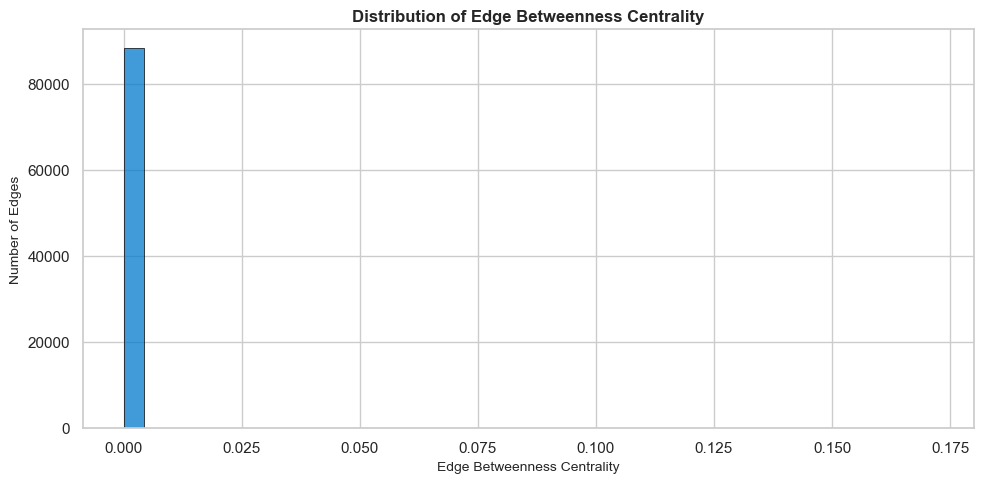

In [208]:
# Extract centrality values for plotting
centrality_values = list(edge_centrality.values())

# Set seaborn style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 5))
sns.histplot(
    centrality_values,
    bins=40,
    color='#007acc',
    kde=False,
    edgecolor='black',
    linewidth=0.5
)

# Titles and labels
plt.title('Distribution of Edge Betweenness Centrality', fontsize=12, fontweight='bold')
plt.xlabel('Edge Betweenness Centrality', fontsize=10)
plt.ylabel('Number of Edges', fontsize=10)

# Ticks formatting
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Tight layout and display
plt.tight_layout()
plt.show()

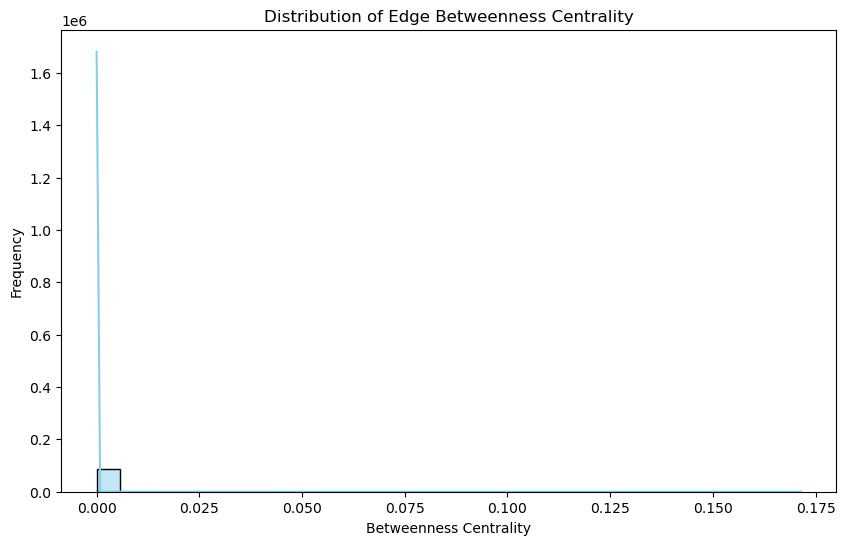

In [193]:
# Extract centrality values for plotting
centrality_values = list(edge_centrality.values())

# Plot the distribution of edge betweenness centrality
plt.figure(figsize=(10, 6))
sns.histplot(centrality_values, kde=True, bins=30, color='skyblue')

# Add labels and title
plt.title('Distribution of Edge Betweenness Centrality')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

# Show plot
plt.show()

## Question 10: Use two community detection algorithms to detect the clusters/community within this social network, then compare the difference of results (the number of clusters and numbers of nodes in each cluster).


--- Community Detection Results ---

Louvain Modularity
Modularity           : 0.7774
Number of Communities: 13
Avg Community Size   : 310.69

Label Propagation
Modularity           : 0.7368
Number of Communities: 44
Avg Community Size   : 91.80


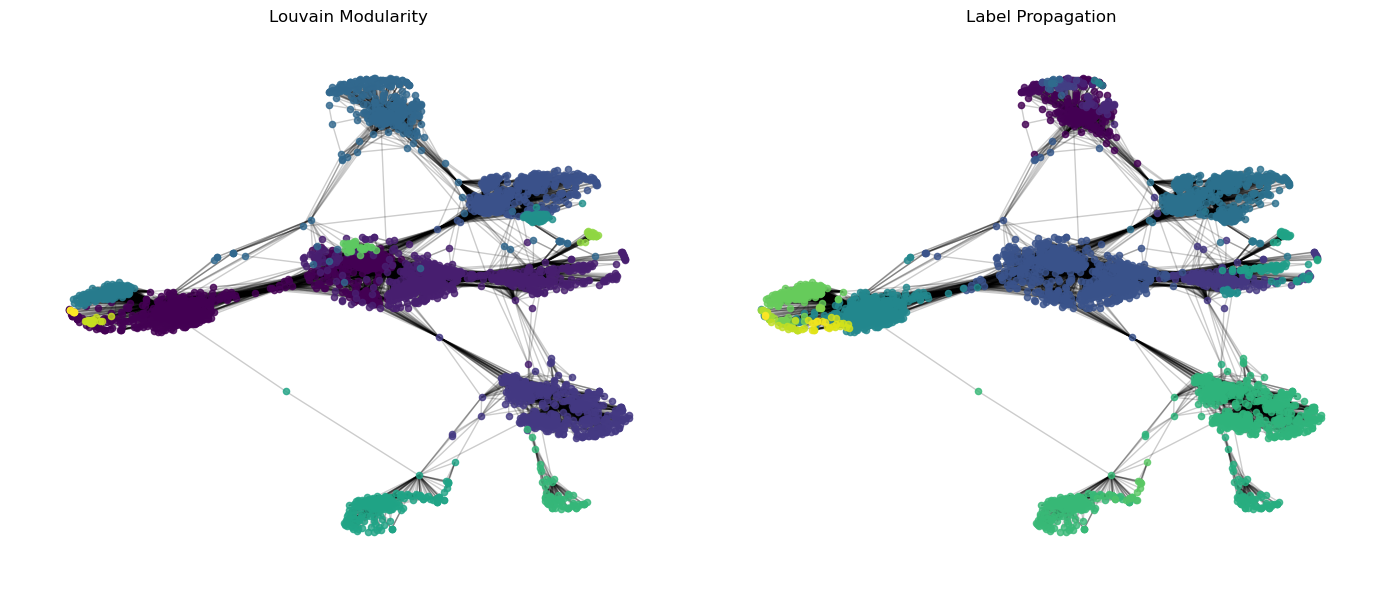

In [195]:
# --- Community Detection Function ---
def detect_communities(G):
    """Detects communities using Louvain and Label Propagation algorithms."""

    algorithms = {
        "Louvain Modularity": nx.algorithms.community.greedy_modularity_communities,
        "Label Propagation": nx.algorithms.community.label_propagation_communities
    }

    results = {}

    print("\n--- Community Detection Results ---")
    for name, method in algorithms.items():
        # Run community detection
        communities = list(method(G))
        
        # Calculate metrics
        modularity = nx.algorithms.community.modularity(G, communities)
        num_comms = len(communities)
        avg_size = sum(len(c) for c in communities) / num_comms

        # Store results
        results[name] = {
            "communities": communities,
            "modularity": modularity,
            "num_communities": num_comms,
            "avg_size": avg_size
        }

        # Display metrics
        print(f"\n{name}")
        print(f"Modularity           : {modularity:.4f}")
        print(f"Number of Communities: {num_comms}")
        print(f"Avg Community Size   : {avg_size:.2f}")

    # Visualize results
    plot_communities(G, results)

# --- Community Visualization Function ---
def plot_communities(G, results):
    """Plots community structures side by side for comparison."""

    plt.figure(figsize=(14, 6))
    pos = nx.spring_layout(G, seed=42)  # Consistent layout for all plots

    for i, (name, data) in enumerate(results.items(), 1):
        plt.subplot(1, 2, i)
        colors = plt.cm.viridis(np.linspace(0, 1, len(data["communities"])))

        # Draw nodes by community
        for idx, community in enumerate(data["communities"]):
            nx.draw_networkx_nodes(G, pos,
                                   nodelist=community,
                                   node_color=[colors[idx]],
                                   node_size=20,
                                   alpha=0.8)

        # Draw edges (same for all)
        nx.draw_networkx_edges(G, pos, alpha=0.2)
        plt.title(name)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Run the community detection
detect_communities(G)